# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

# Ingest Data  

In [6]:
#df = pd.read_excel("World military power.xlsx",)

In [ ]:
#new_header = df.iloc[0]
#df = df[1:]
#df.columns = new_header
#df = df.reset_index(drop=True)

In [7]:
df = pd.read_excel('World military power.xlsx', header=1)

In [8]:
df.head()

Military Strength  Military Strength Power Index Aircraft Strength  Aircraft Strength value Fighter/Interceptor Strength  Fighter/Interceptor Strength value Attack Aircraft Strength  Attack Aircraft Strength value Transport Aircraft Fleet Strength  Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  Trainer Aircraft Fleet value Helicopter Fleet Strength  Helicopter Fleet Strength value Attack Helicopter Fleet Strength  Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  Self-Propelled Artillery Strength value Towed Artillery Strength  Towed Artillery Strength value Rocket Projector Strength  Rocket Projector Strength value Navy Fleet Strengths  Navy Fleet Strengths value Aircraft Carrier Fleet Strength  Aircraft Carrier Fleet Strength value Submarine Fleet Strength  Submarine Fleet Strength value Destroyer Fleet Strength  Destroyer Fleet Strength value  \
0       Afghanistan                         1.3444       Afghanistan                    260.0                  Afghanistan                                 0.0              Afghanistan                            25.0                       Afghanistan                                     30.0            Afghanistan                           0.0               Afghanistan                            187.0                      Afghanistan                                     0.0   Afghanistan                  0.0      Afghanistan                  1062.0                       Afghanistan                                      0.0              Afghanistan                           176.0               Afghanistan                             50.0          Afghanistan                         0.0                     Afghanistan                                    0.0              Afghanistan                             0.0              Afghanistan                             0.0   
1           Albania                         2.3137           Albania                     19.0                      Albania                                 0.0                  Albania                             0.0                           Albania                                      0.0                Albania                           0.0                   Albania                             19.0                          Albania                                     0.0       Albania                  0.0          Albania                   467.0                           Albania                                      0.0                  Albania                             0.0                   Albania                              0.0              Albania                        38.0                         Albania                                    0.0                  Albania                             0.0                  Albania                             0.0   
2           Algeria                         0.4659           Algeria                    551.0                      Algeria                               103.0                  Algeria                            22.0                           Algeria                                     59.0                Algeria                          87.0                   Algeria                            257.0                          Algeria                                    45.0       Algeria                880.0          Algeria                  7361.0                           Algeria                                    320.0                  Algeria                           240.0                   Algeria                            316.0              Algeria                       201.0                         Algeria                                    0.0                  Algeria                             6.0                  Algeria                             0.0   
3            Angola                         0.8379            Angola              

# EDA

## Convert multi index columns to one level

In [10]:
df.columns[2::2]

Index(['Aircraft Strength', 'Fighter/Interceptor Strength', 'Attack Aircraft Strength', 'Transport Aircraft Fleet Strength', 'Trainer Aircraft Fleet', 'Helicopter Fleet Strength', 'Attack Helicopter Fleet Strength', 'Tank Strength', 'AFV/APC Strength', 'Self-Propelled Artillery Strength', 'Towed Artillery Strength', 'Rocket Projector Strength', 'Navy Fleet Strengths', 'Aircraft Carrier Fleet Strength', 'Submarine Fleet Strength', 'Destroyer Fleet Strength', 'Frigate Fleet Strength', 'defense spending budget', 'External Debt', 'Airport Totals', 'Oil Production', 'Oil Consumption', 'Proven Oil Reserves', 'Available Manpower', 'Total Population', 'Total Square Land Area', 'Total Coastline Coverage', 'Total Waterway Coverage', 'Total Border Coverage'], dtype='object')

In [11]:
df[df.columns[2::2]].head()

Aircraft Strength Fighter/Interceptor Strength Attack Aircraft Strength Transport Aircraft Fleet Strength Trainer Aircraft Fleet Helicopter Fleet Strength Attack Helicopter Fleet Strength Tank Strength AFV/APC Strength Self-Propelled Artillery Strength Towed Artillery Strength Rocket Projector Strength Navy Fleet Strengths Aircraft Carrier Fleet Strength Submarine Fleet Strength Destroyer Fleet Strength Frigate Fleet Strength defense spending budget External Debt Airport Totals Oil Production Oil Consumption Proven Oil Reserves Available Manpower Total Population Total Square Land Area Total Coastline Coverage Total Waterway Coverage Total Border Coverage
0       Afghanistan                  Afghanistan              Afghanistan                       Afghanistan            Afghanistan               Afghanistan                      Afghanistan   Afghanistan      Afghanistan                       Afghanistan              Afghanistan               Afghanistan          Afghanistan                     Afghanistan              Afghanistan              Afghanistan            Afghanistan             Afghanistan   Afghanistan    Afghanistan    Afghanistan     Afghanistan         Afghanistan        Afghanistan      Afghanistan            Afghanistan              Afghanistan             Afghanistan           Afghanistan
1           Albania                      Albania                  Albania                           Albania                Albania                   Albania                          Albania       Albania          Albania                           Albania                  Albania                   Albania              Albania                         Albania                  Albania                  Albania                Albania                 Albania       Albania        Albania        Albania         Albania             Albania            Albania          Albania                Albania                  Albania                 Albania               Albania
2           Algeria                      Algeria                  Algeria                           Algeria                Algeria                   Algeria                          Algeria       Algeria          Algeria                           Algeria                  Algeria                   Algeria              Algeria                         Algeria                  Algeria                  Algeria                Algeria                 Algeria       Algeria        Algeria        Algeria         Algeria             Algeria            Algeria          Algeria                Algeria                  Algeria                 Algeria               Algeria
3            Angola                       Angola                   Angola                            Angola                 Angola                    Angola                           Angola        Angola           Angola                            Angola                   Angola                    Angola               Angola                          Angola                   Angola                   Angola                 Angola                  Angola        Angola         Angola         Angola          Angola              Angola             Angola           Angola                 Angola                   Angola                  Angola                Angola
4         Argentina                    Argentina                Argentina                         Argentina              Argentina                 Argentina                        Argentina     Argentina        Argentina                         Argentina                Argentina                 Argentina            Argentina                       Argentina                Argentina                Argentina              Argentina               Argentina     Argentina      Argentina      Argentina       Argentina           Argentina          Argentina        Argentina              Argentina                Argentina               Argentina             Argentina

## Detect and drop duplicated columns

In [12]:
df.drop(columns = df.columns[2::2],axis=1,inplace=True)

In [13]:
df.rename(columns= {"Military Strength":"Countries"},inplace=True)

## Check for missing values 

In [14]:
df.isnull().sum()

Countries                                   0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [15]:
df[["Countries","Navy Fleet Strengths value","Aircraft Carrier Fleet Strength value","Submarine Fleet Strength value","Destroyer Fleet Strength value","Frigate Fleet Strength value","Total Coastline Coverage value","Total Border Coverage value"]]
# Deniz gücü -Navy Fleet Strengths value- feature değeri 0 olanların diğer sutünları nan. 0 yapmakta herhangi bir sakınca yok.

Countries  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  Destroyer Fleet Strength value  Frigate Fleet Strength value Total Coastline Coverage value  Total Border Coverage value
0                         Afghanistan                         0.0                                    0.0                             0.0                             0.0                           0.0                            0.0                       5987.0
1                             Albania                        38.0                                    0.0                             0.0                             0.0                           0.0                          362.0                        691.0
2                             Algeria                       201.0                                    0.0                             6.0                             0.0                           5.0                          998.0                       6734.0
3                              Angola                        57.0                                    0.0                             0.0                             0.0                           0.0                         1600.0                       5369.0
4                           Argentina                        49.0                                    0.0                             2.0                             4.0                           0.0                         4989.0                      11968.0
5                             Armenia                         0.0                                    NaN                             NaN                             NaN                           NaN                            NaN                       1570.0
6                           Australia                        48.0                                    2.0                             6.0                             2.0                           8.0                        25760.0                          NaN
7                             Austria                         0.0                                    NaN                             NaN                             NaN                           NaN                            NaN                       2524.0
8                          Azerbaijan                        31.0                                    0.0                             4.0                             0.0                           1.0                          713.0                       2468.0
9                             Bahrain                        39.0                                    0.0                             0.0                             0.0                           1.0                          161.0                          NaN
10                         Bangladesh                       112.0                                    0.0                             2.0                             0.0                           8.0                          580.0                       4413.0
11                            Belarus                         0.0                                    NaN                             NaN                             NaN                           NaN                            NaN                       3599.0
12                            Belgium                        17.0                                    0.0                             0.0                             0.0                           2.0                           67.0                       1297.0
13                             Bhutan                         0.0                                    NaN                             NaN                             NaN                           NaN                            NaN                       1136.0
14                            Bolivia                       173.0                                    0.0                             0.0       

In [18]:
df[["Countries","Navy Fleet Strengths value","Aircraft Carrier Fleet Strength value","Submarine Fleet Strength value","Destroyer Fleet Strength value","Frigate Fleet Strength value","Total Coastline Coverage value"]] = df[["Countries","Navy Fleet Strengths value","Aircraft Carrier Fleet Strength value","Submarine Fleet Strength value","Destroyer Fleet Strength value","Frigate Fleet Strength value","Total Coastline Coverage value"]].fillna(value= 0)

In [19]:
df.isnull().sum()

Countries                                  0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

In [20]:
df[["Countries","Total Border Coverage value"]] 
# Ada ülkeleri olduğu için başka ülkelerle sınırı yok. nan değerleri 0 yapmakta sakınca yok.

Countries  Total Border Coverage value
0                         Afghanistan                       5987.0
1                             Albania                        691.0
2                             Algeria                       6734.0
3                              Angola                       5369.0
4                           Argentina                      11968.0
5                             Armenia                       1570.0
6                           Australia                          NaN
7                             Austria                       2524.0
8                          Azerbaijan                       2468.0
9                             Bahrain                          NaN
10                         Bangladesh                       4413.0
11                            Belarus                       3599.0
12                            Belgium                       1297.0
13                             Bhutan                       1136.0
14                            Bolivia                       7252.0
15             Bosnia and Herzegovina                       1543.0
16                           Botswana                       4347.0
17                             Brazil                      16145.0
18                           Bulgaria                       1806.0
19                       Burkina Faso                       3611.0
20                           Cambodia                       2530.0
21                           Cameroon                       5018.0
22                             Canada                       8893.0
23           Central African Republic                       5920.0
24                               Chad                       6406.0
25                              Chile                       7801.0
26                              China                      22457.0
27                           Colombia                       6672.0
28                            Croatia                       2237.0
29                               Cuba                         29.0
30                            Czechia                       2046.0
31   Democratic Republic of the Congo                      10481.0
32                            Denmark                        140.0
33                 Dominican Republic                        376.0
34                            Ecuador                       2237.0
35                              Egypt                       2612.0
36                        El Salvador                        590.0
37                            Estonia                        657.0
38                           Ethiopia                       5925.0
39                            Finland                       2563.0
40                             France                       4072.0
41                              Gabon                       3261.0
42                            Georgia                       1814.0
43                            Germany                       3694.0
44                              Ghana                       2420.0
45                             Greece                       1110.0
46                          Guatemala                       1667.0
47                           Honduras                       1575.0
48                            Hungary                       2106.0
49                              India                      13888.0
50                          Indonesia                       2958.0
51                               Iran                       5894.0
52                               Iraq                       3809.0
53                            Ireland                        443.0
54                             Israel                       1068.0
55                              Italy                       1836.0
56                        Ivory Coast                       3458.0
57                              Japan                          NaN
58                             Jordan                       1744.0
59      

In [21]:
df[["Countries","Total Border Coverage value"]] = df[["Countries","Total Border Coverage value"]].fillna(value=0)

## Fix the dtypes

In [22]:
for i in df.select_dtypes("object").columns[1:]:
    df[i] = [item.replace(",","") if type(item) == str else item for item in df[i]]
    df[i] = df[i].astype(float)

# Object feature'lar içinde float değerler ve str değerler var. Str değerleri float değerine dönüştürmek için bu formül kullanıldı. 

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [24]:
df.columns

Index(['Countries', 'Military Strength Power Index', 'Aircraft Strength value', 'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength value', 'Tank Strength value', 'AFV/APC Strength value', 'Self-Propelled Artillery Strength value', 'Towed Artillery Strength value', 'Rocket Projector Strength value', 'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'defense spending budget value', 'External Debt value', 'Airport Totals value', 'Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value'], dtype='object')

In [25]:
df.drop(columns= ['Total Square Land Area value',
               'Total Coastline Coverage value',
               'Total Waterway Coverage value',
               'Total Border Coverage value'],axis=1,inplace=True)
# Military güce etkisi olmadığını düşündüğüm feature'ları düşürdüm.

In [26]:
df.to_csv("Military.csv",index=False)

In [3]:
df = pd.read_csv("Military.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries                                138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

## Visualy inspect the some features

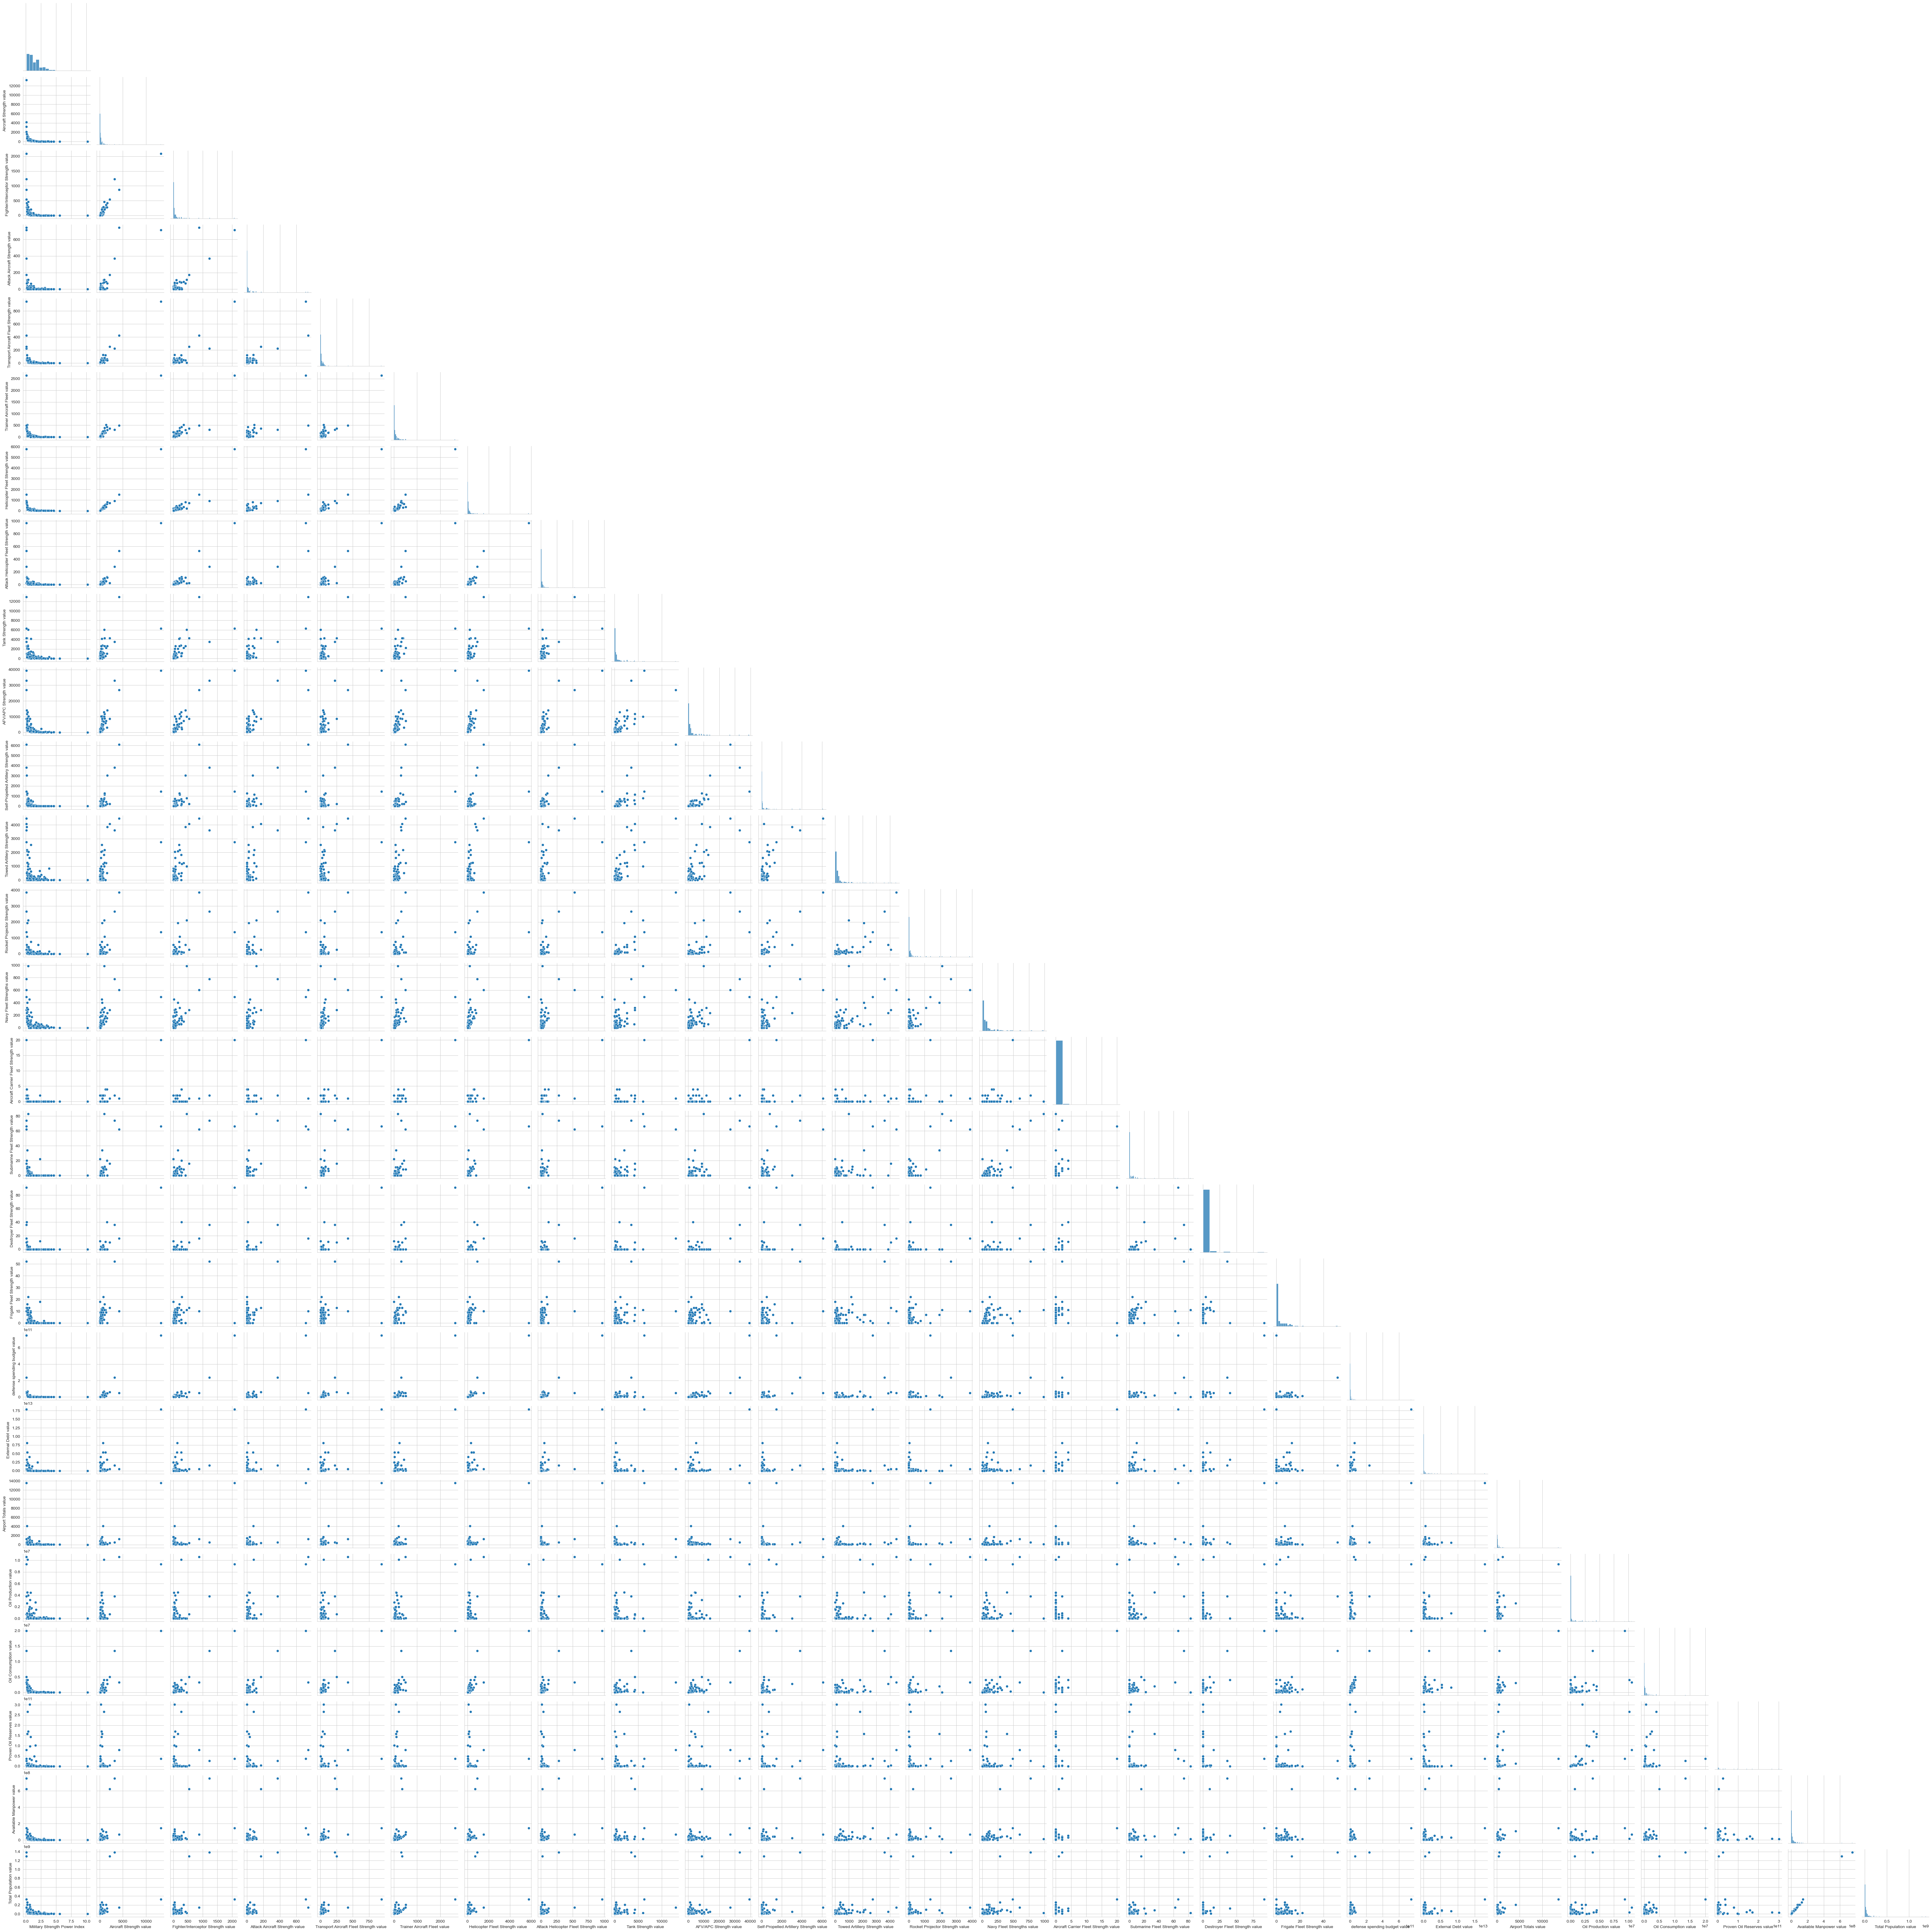

In [74]:
sns.pairplot(df,corner=True)
plt.show()

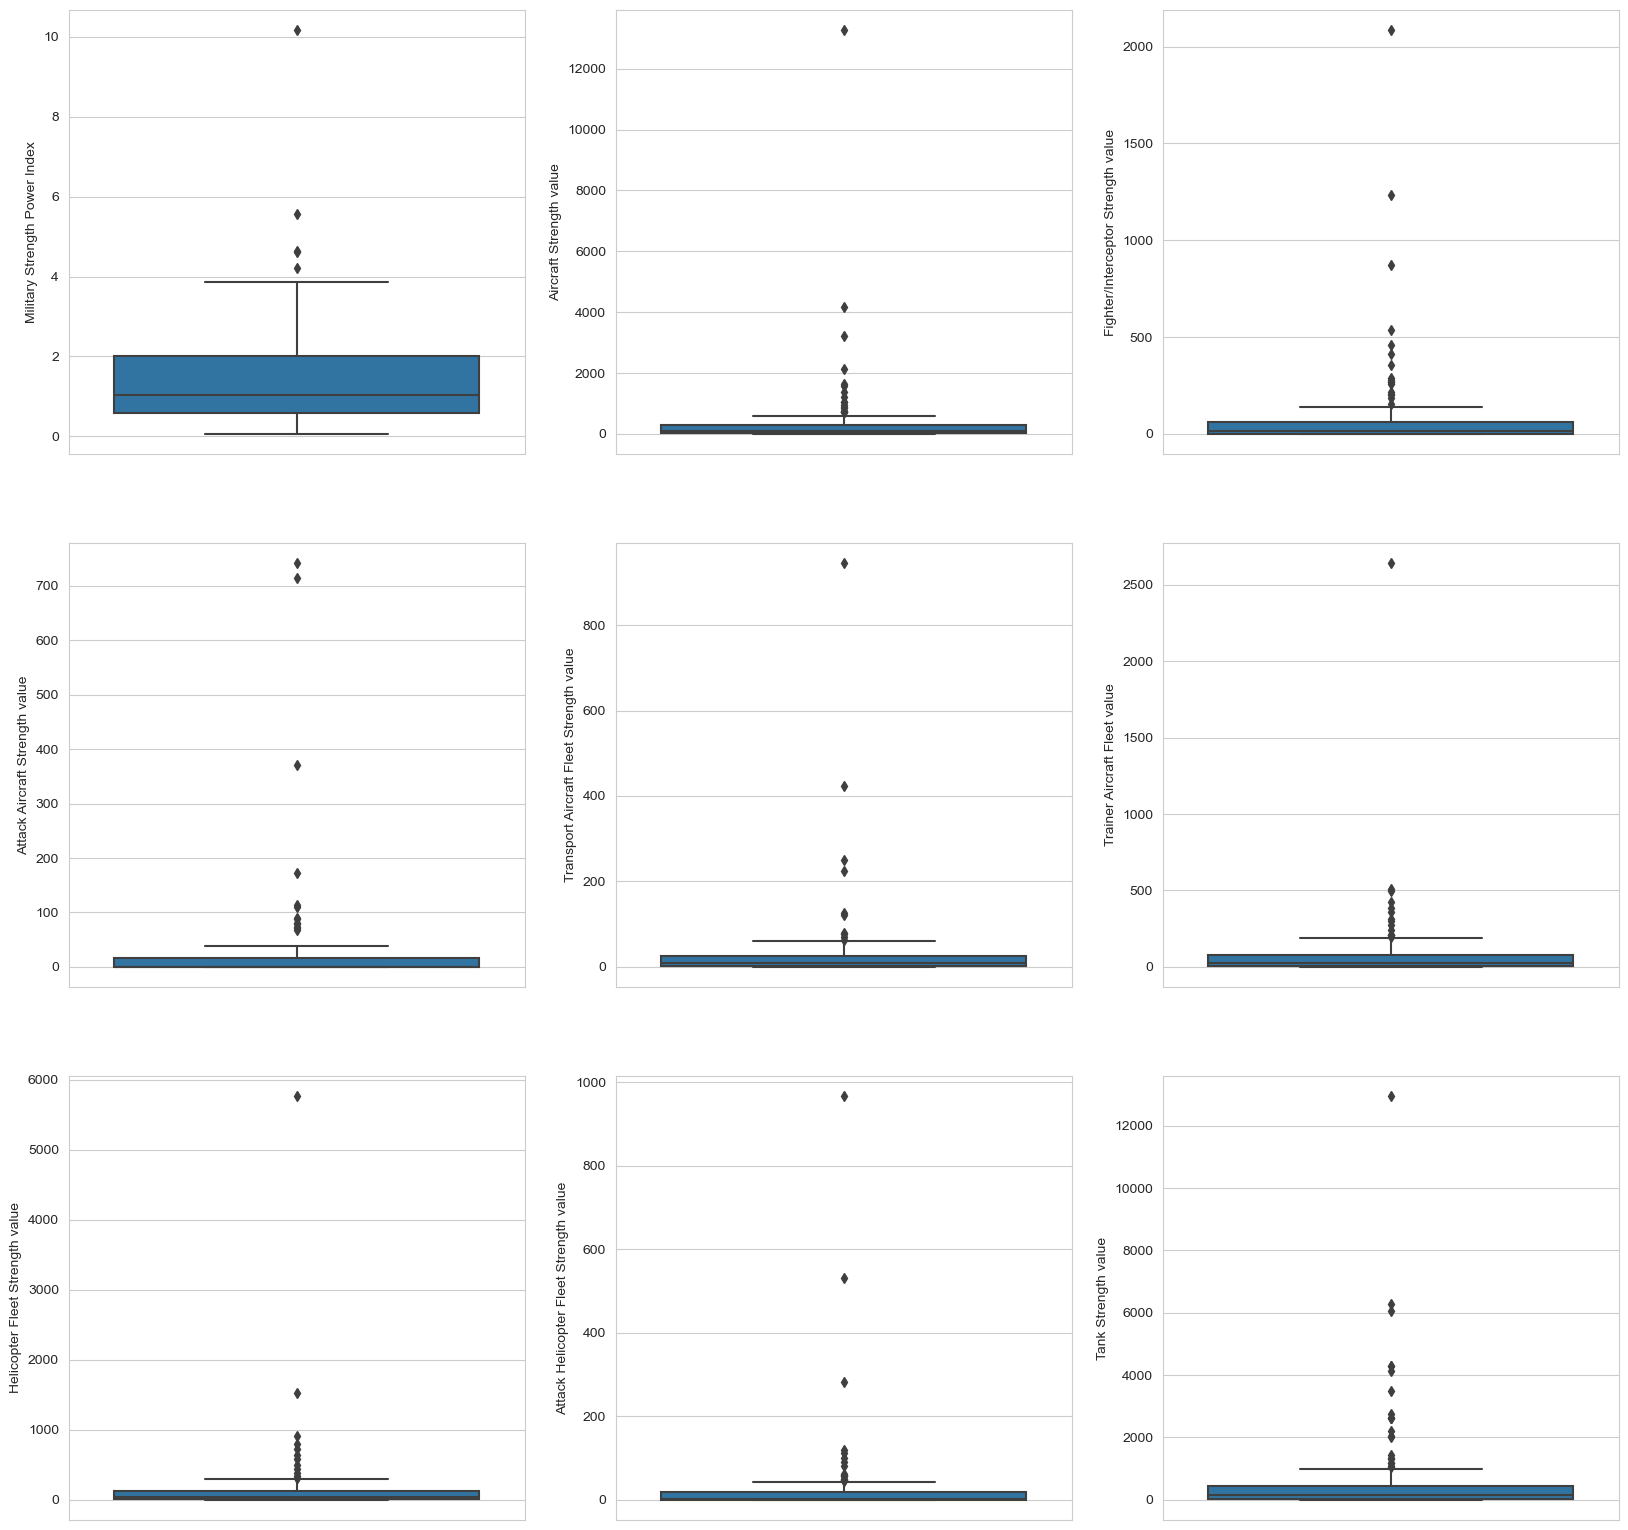

In [95]:
plt.figure(figsize = (20,20))
k = 331
for i in df.columns[1:10]:
    
    plt.subplot(k)
    sns.boxplot(y = i, x = i, data = df)
    k += 1
# Outlier gibi görünen bir çok değer var. Ancak Military force olduğu için düşürmek veya değiştirmek mantıksız diye düşünüyorum.

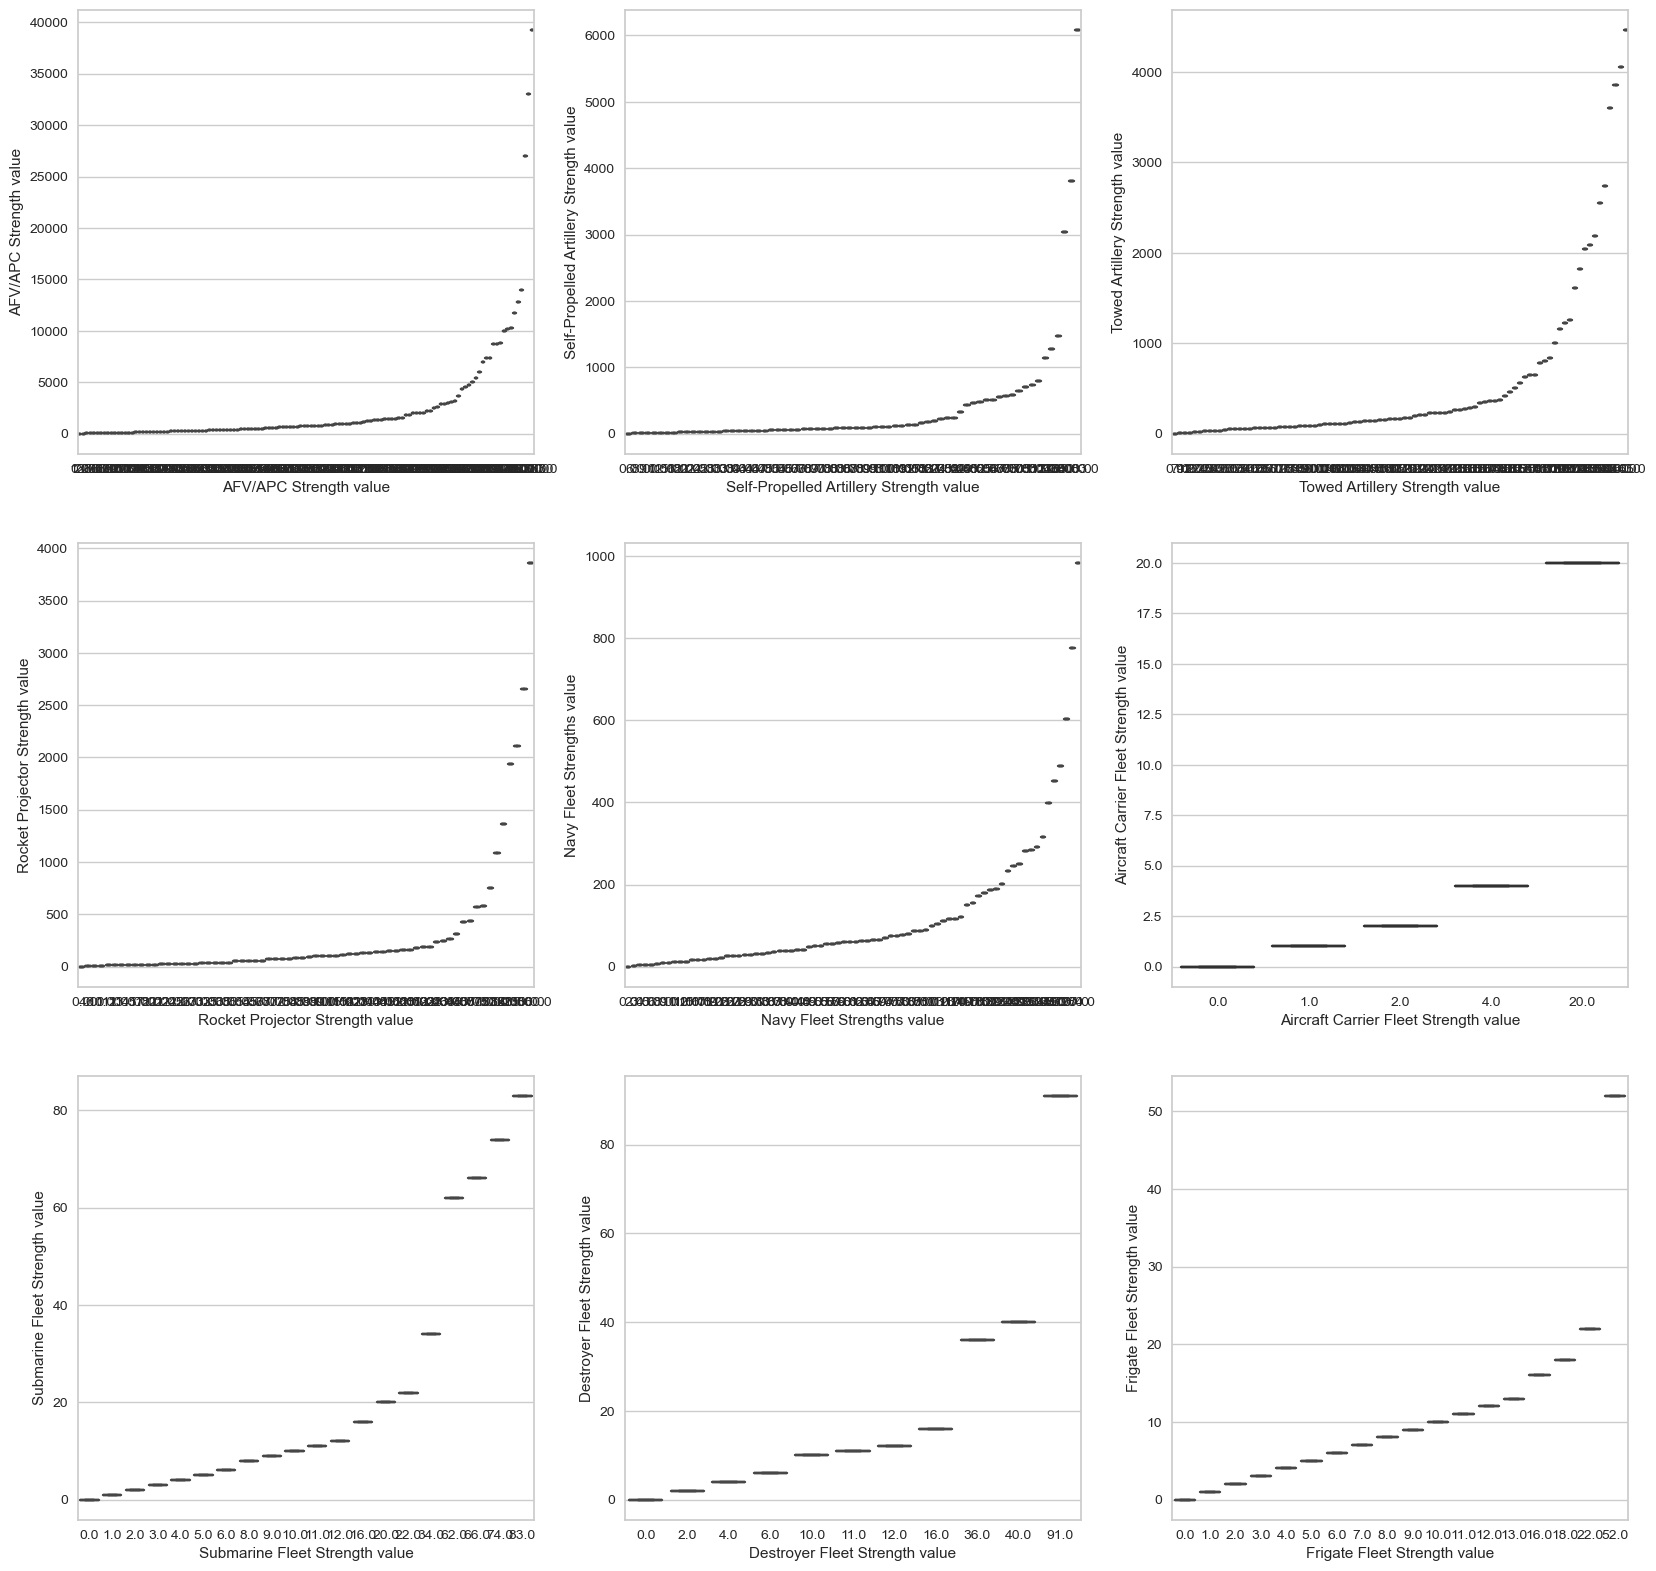

In [69]:
plt.figure(figsize = (20,20))
k = 331
for i in df.columns[10:19]:
    
    plt.subplot(k)
    sns.boxplot(y = i, x = i, data = df)
    k += 1

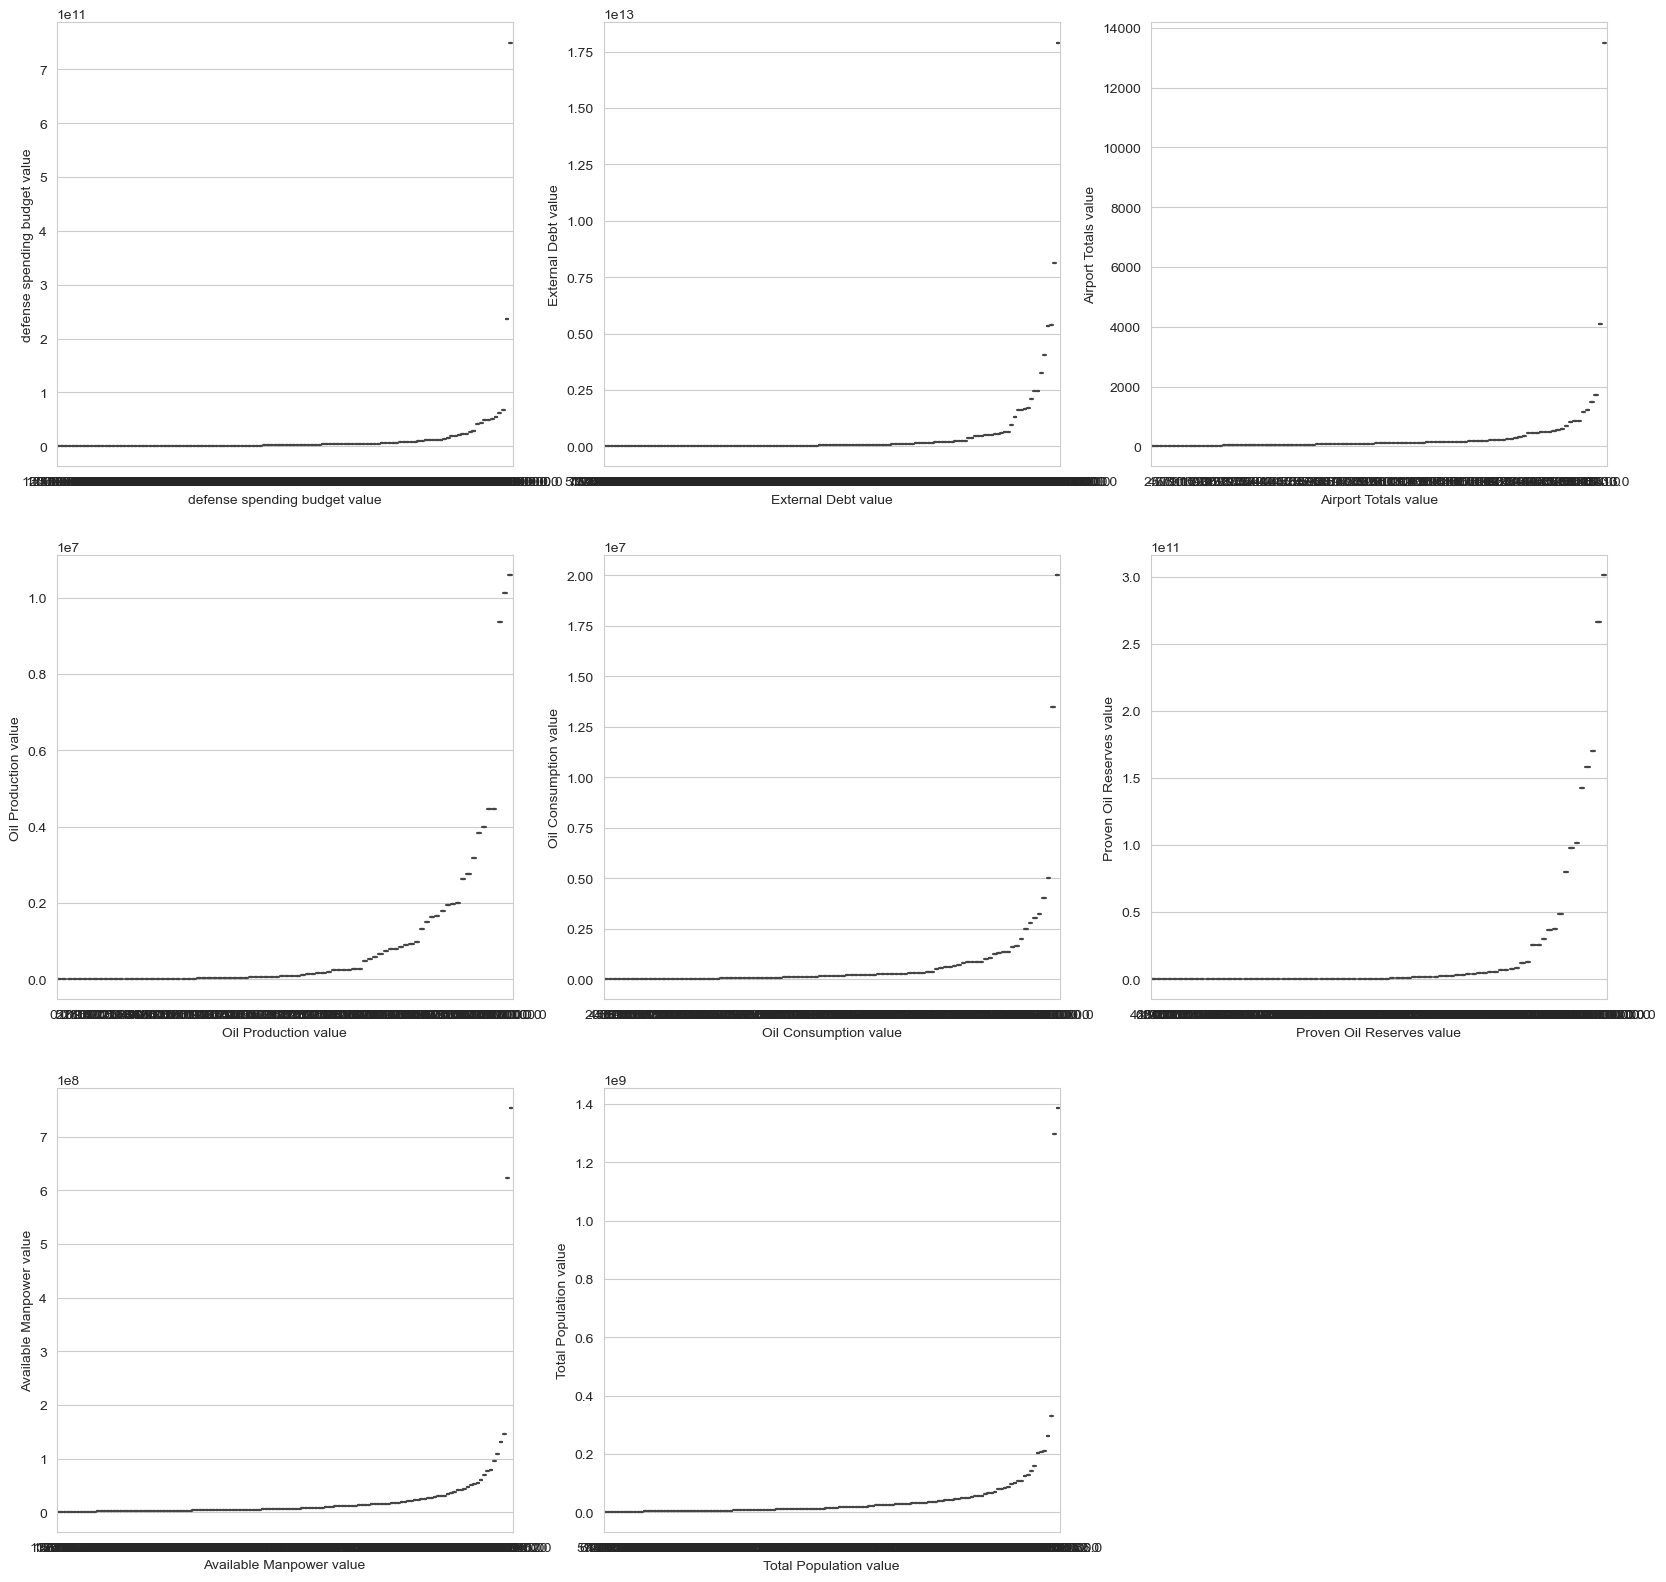

In [97]:
plt.figure(figsize = (20,20))
k = 331
for i in df.columns[19:]:
    
    plt.subplot(k)
    sns.boxplot(y = i, x = i, data = df)
    k += 1

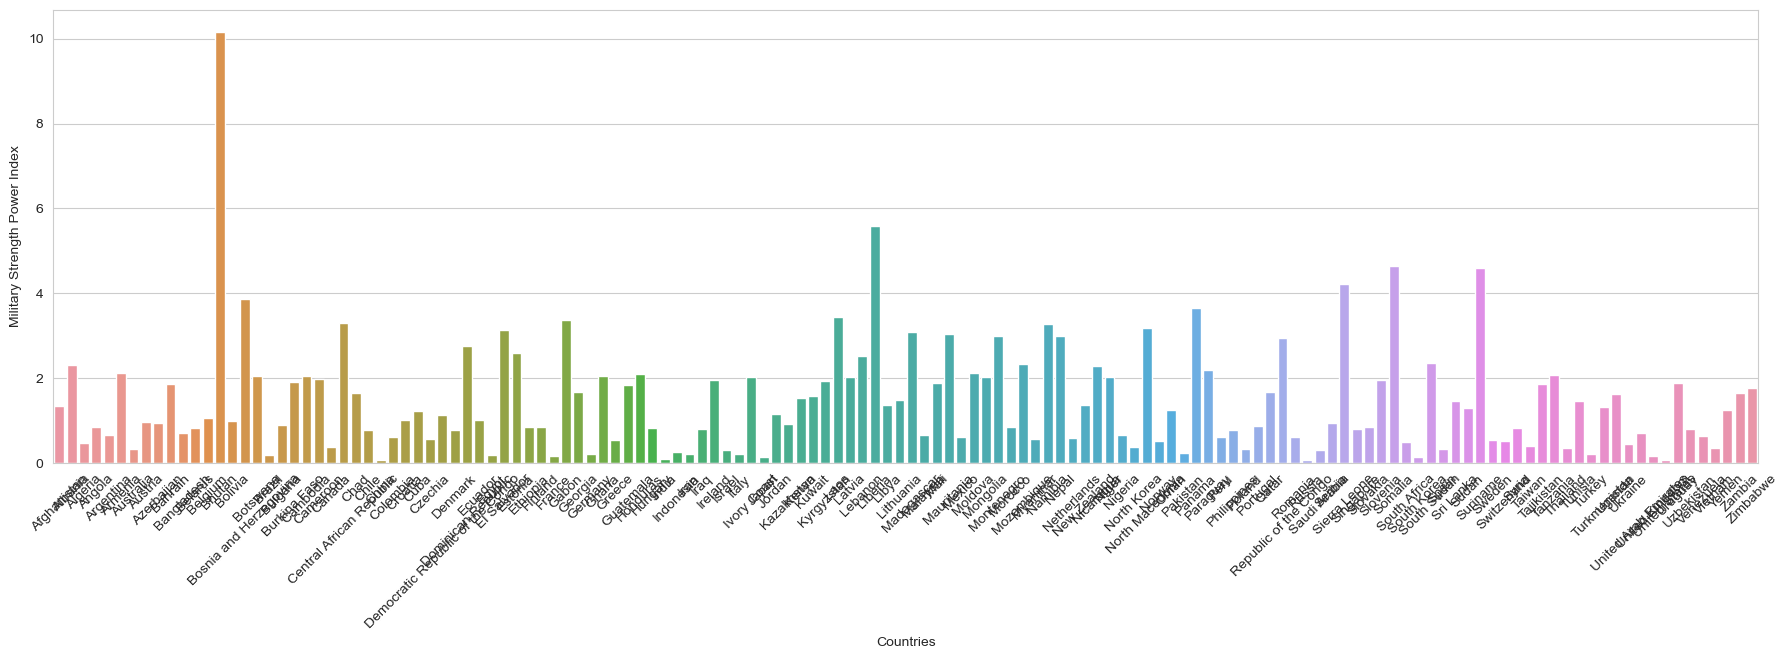

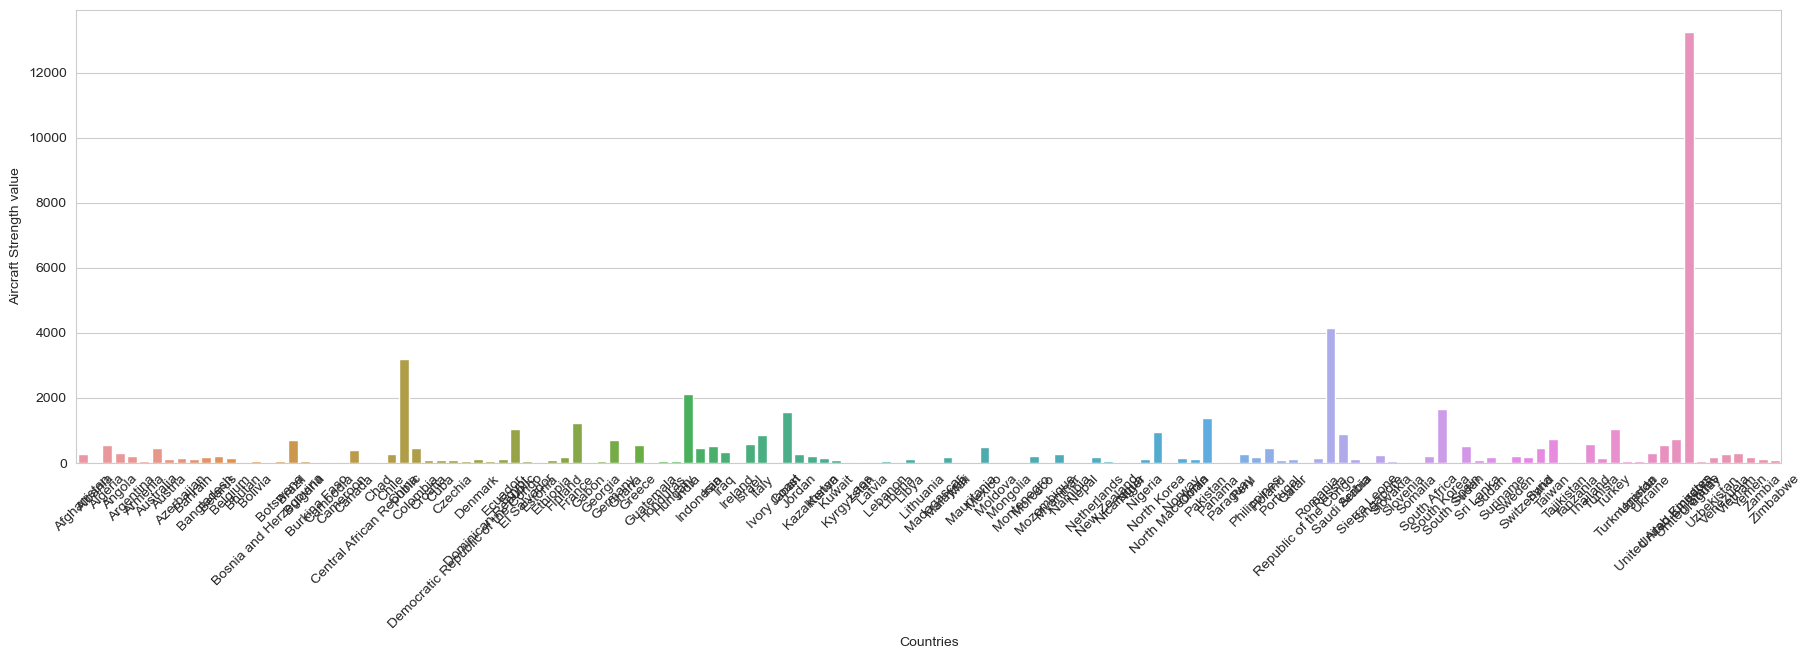

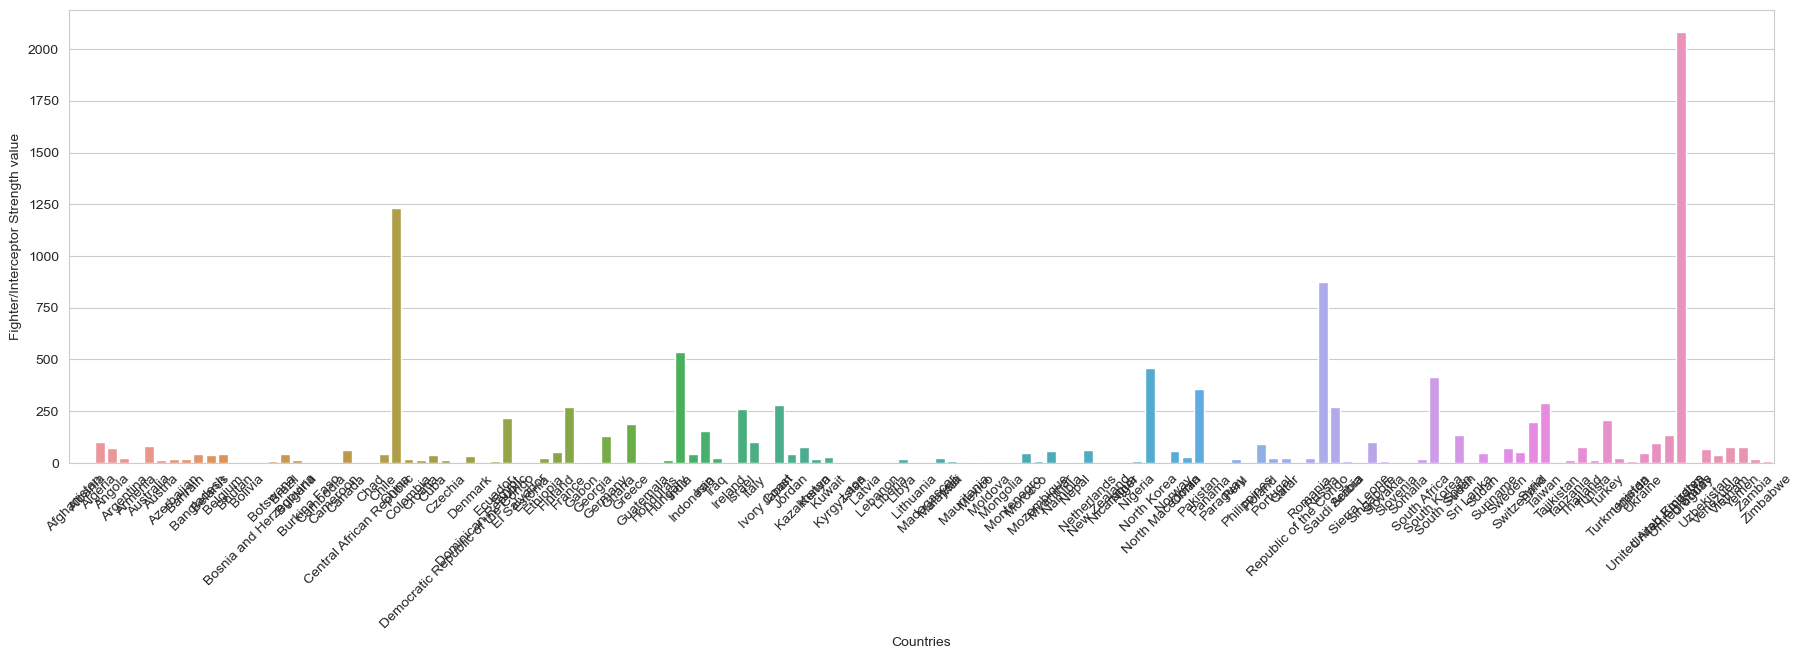

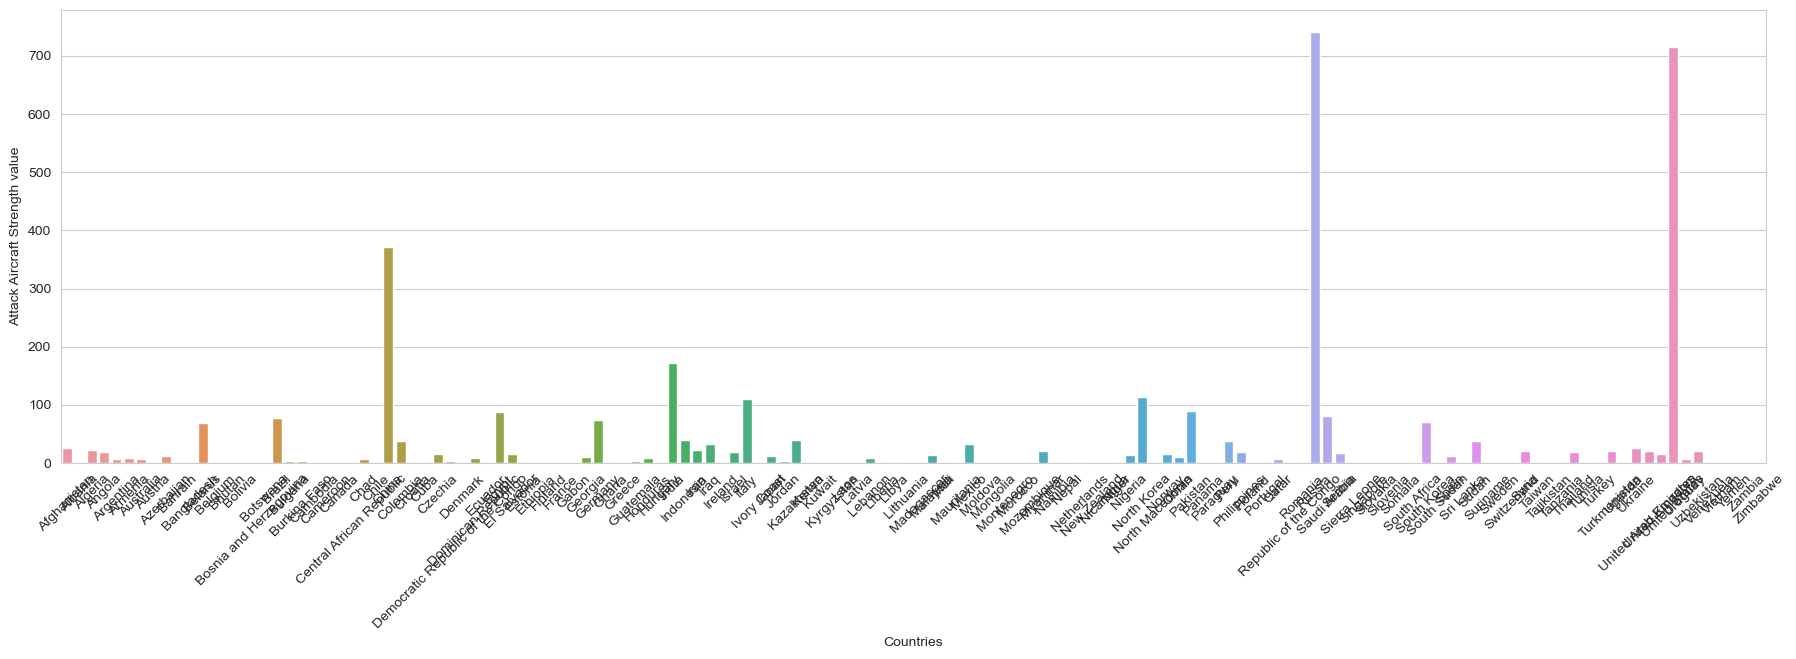

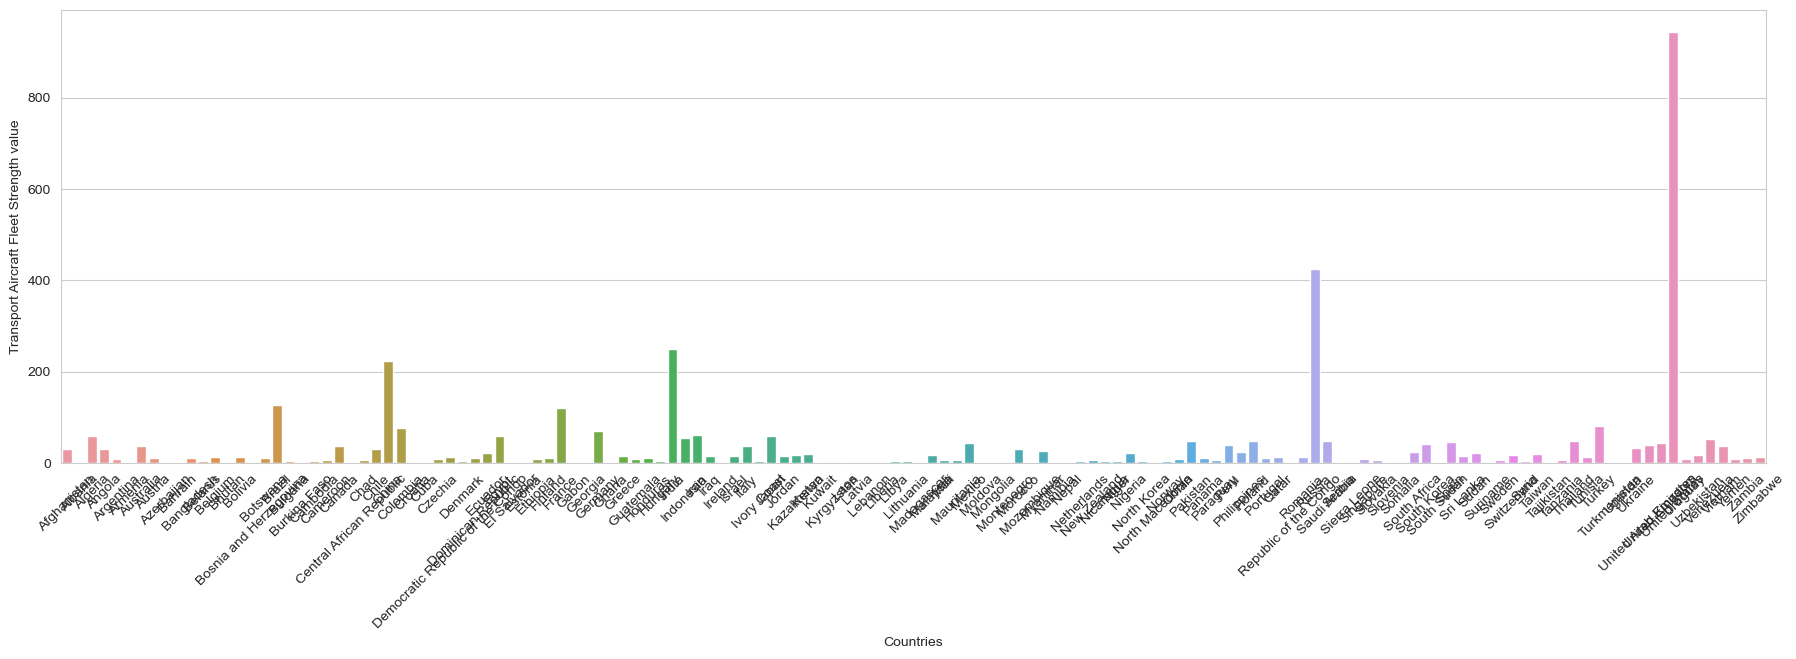

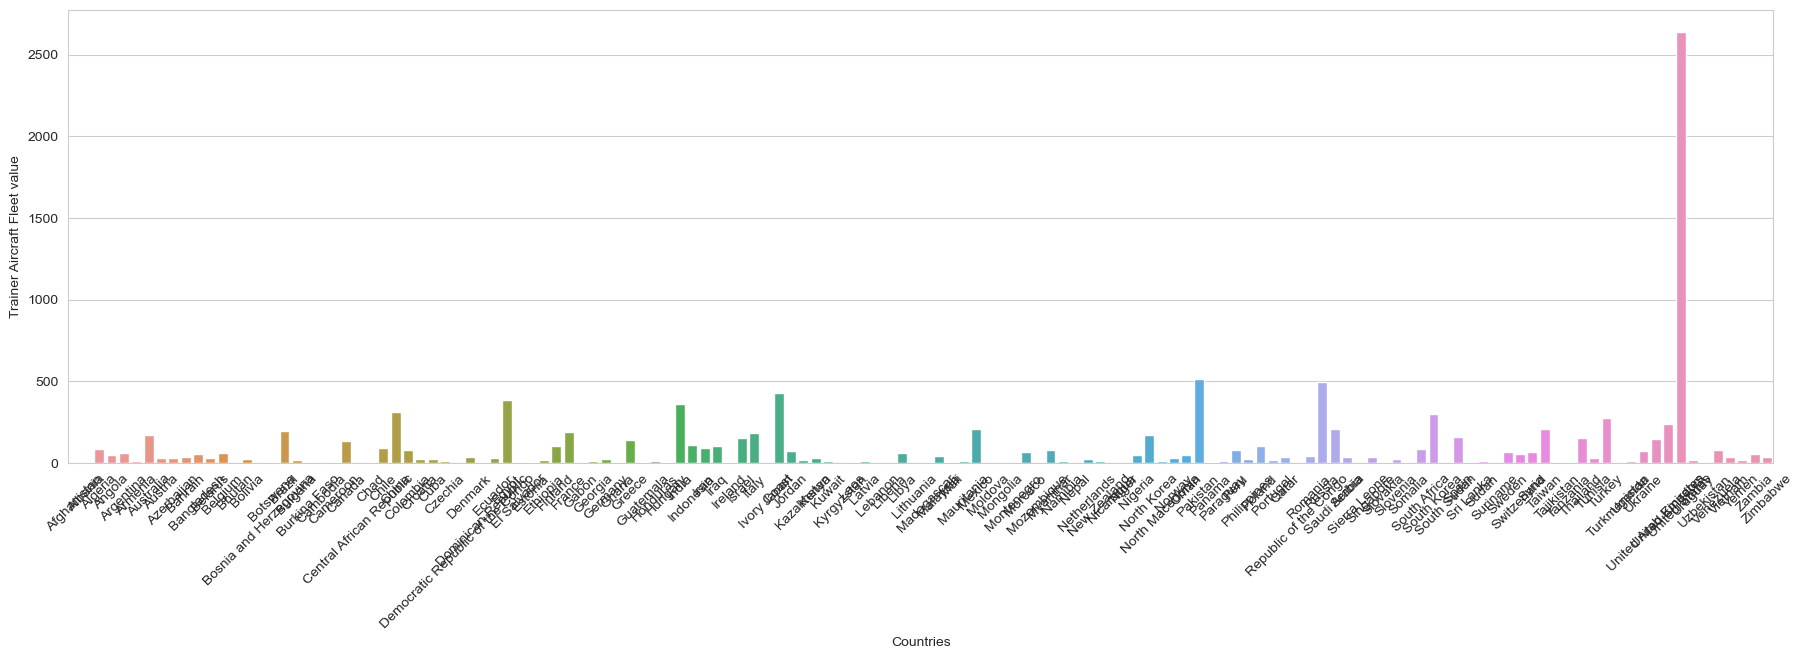

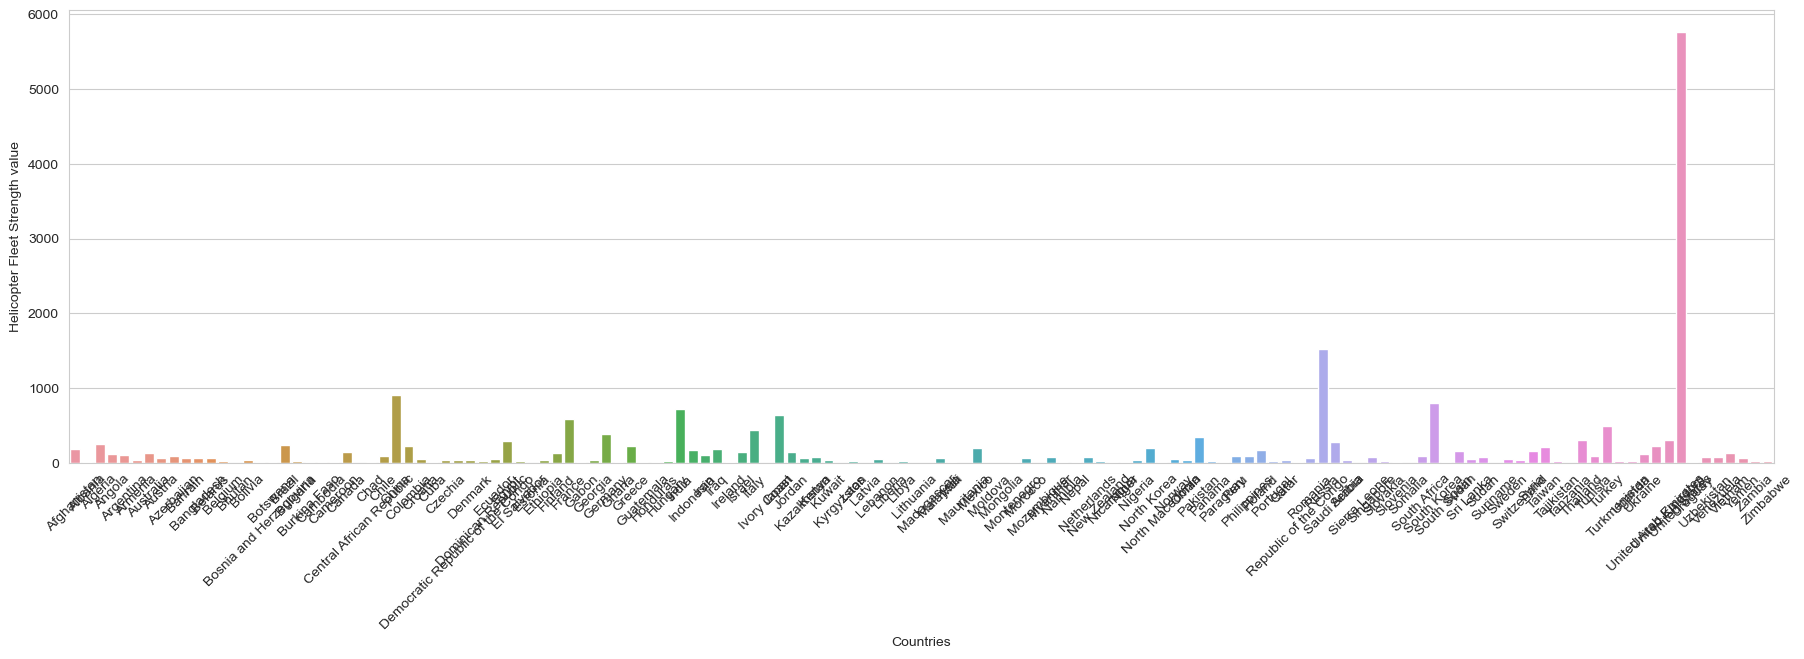

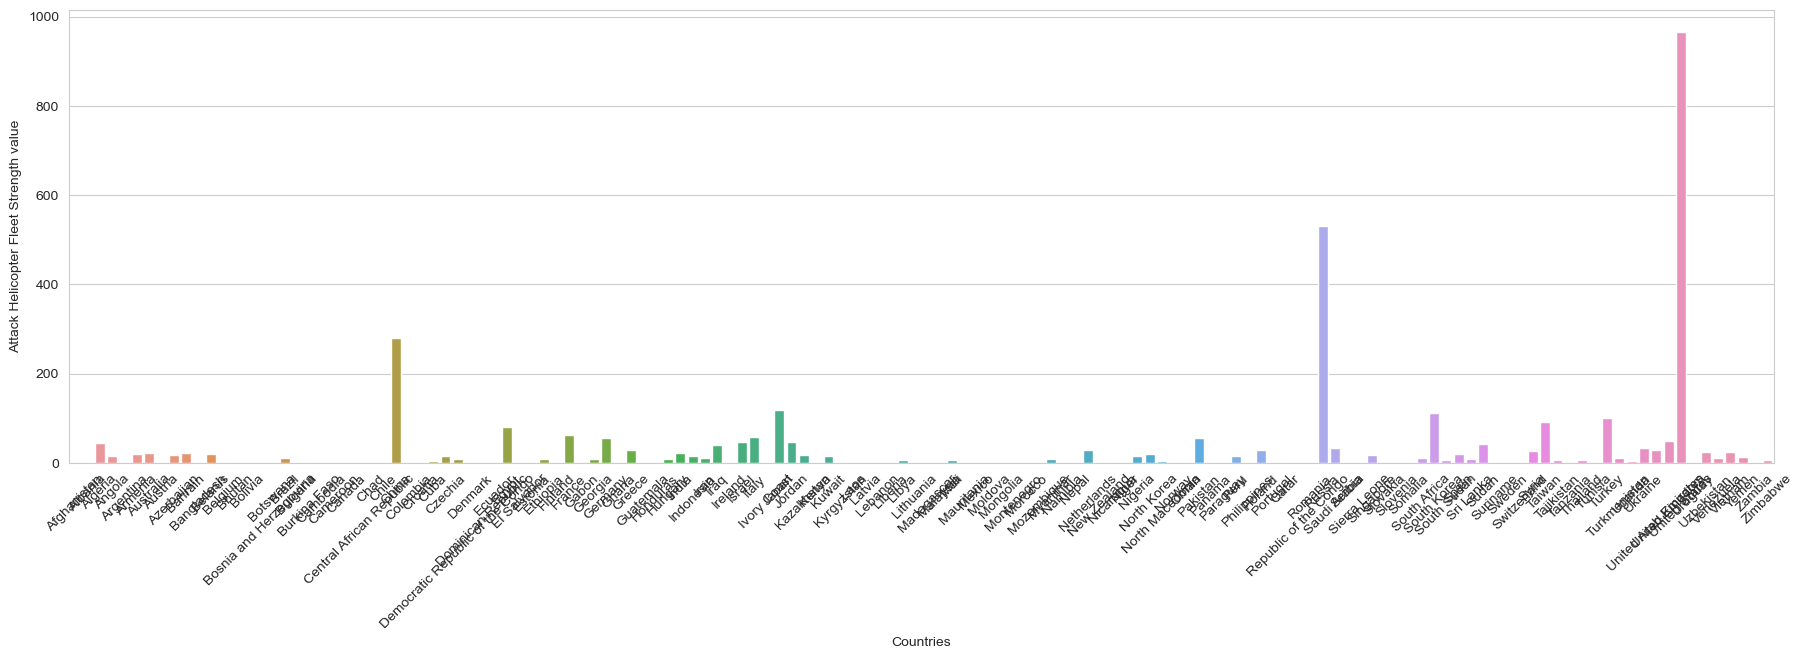

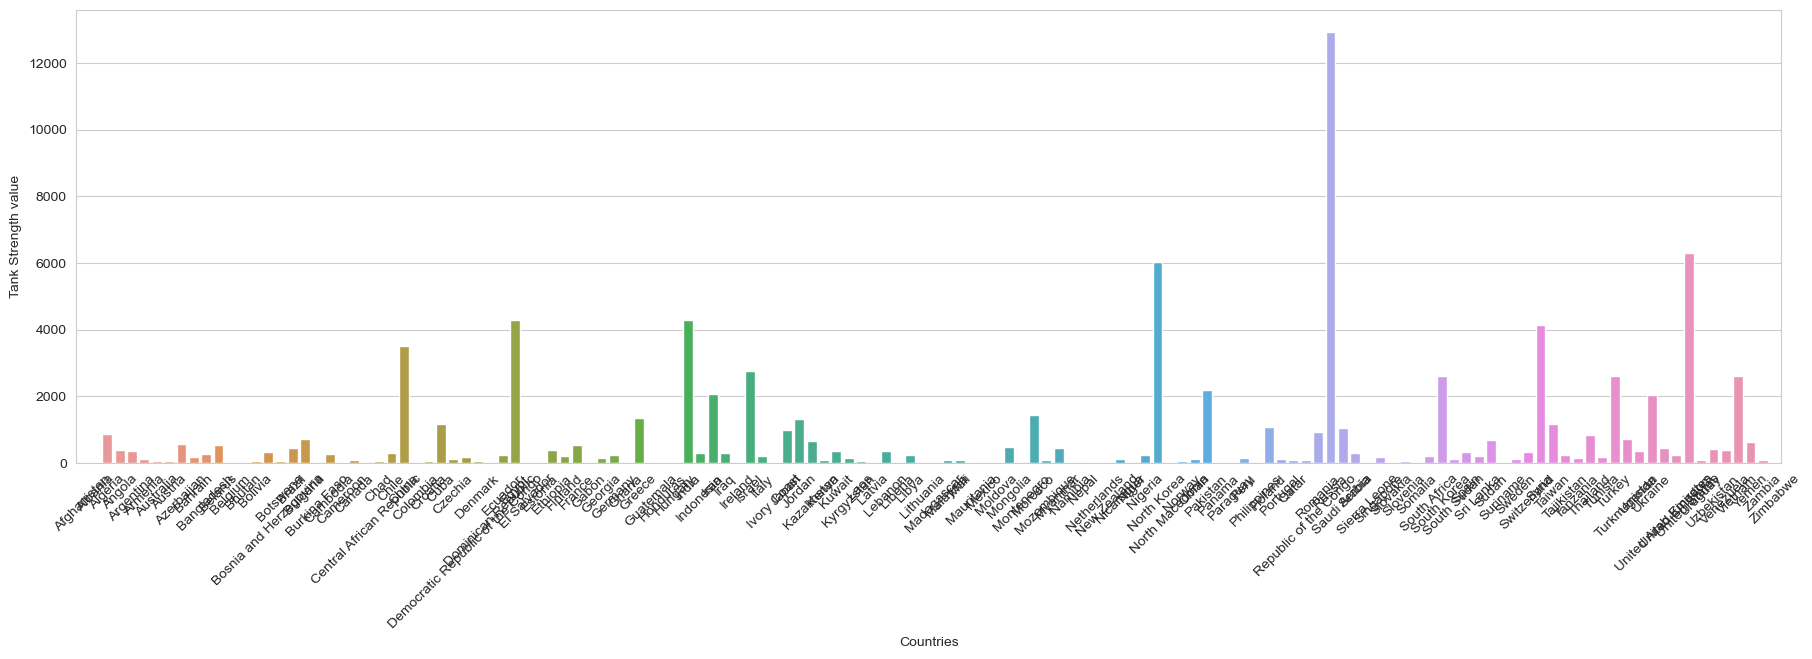

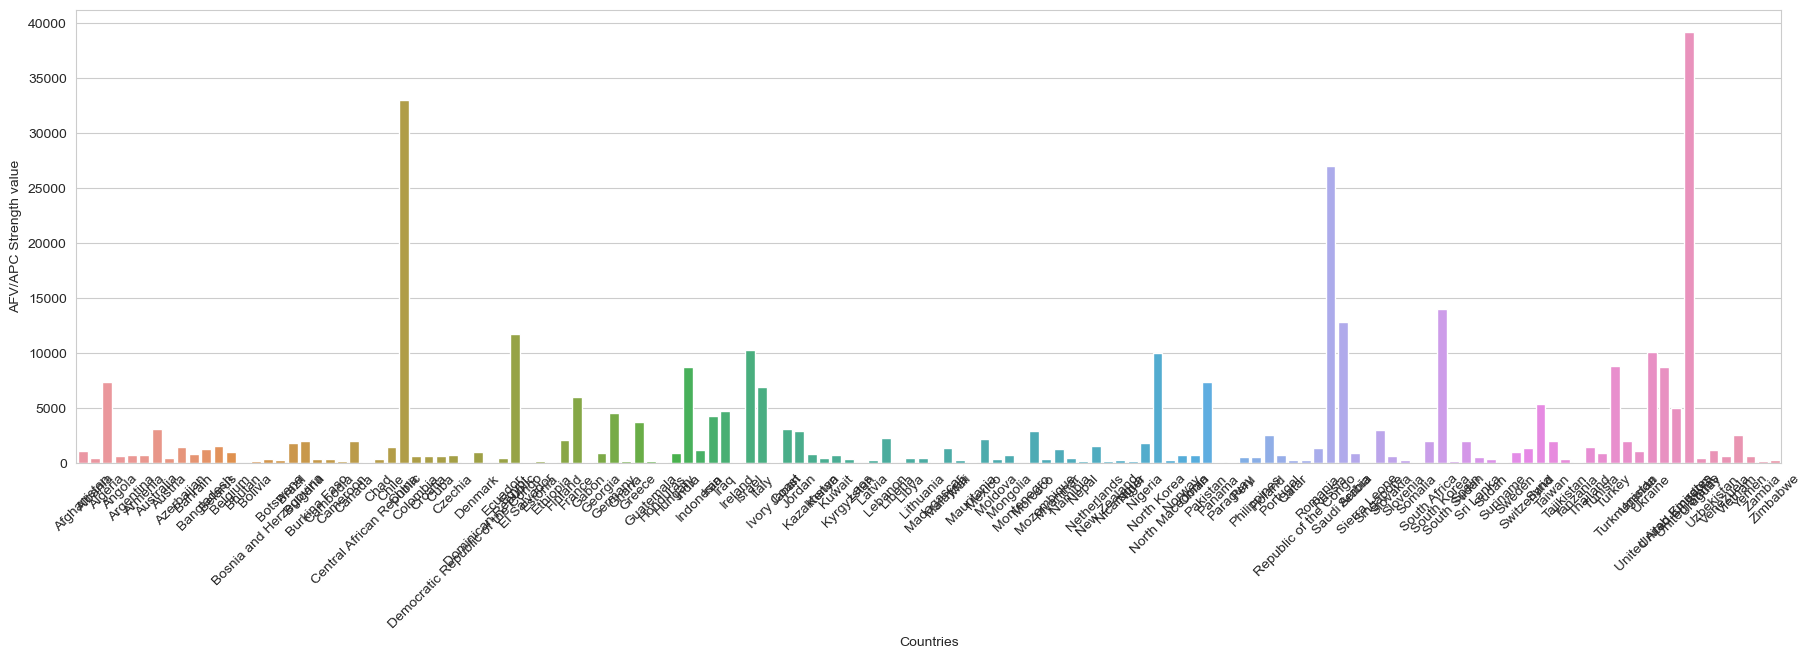

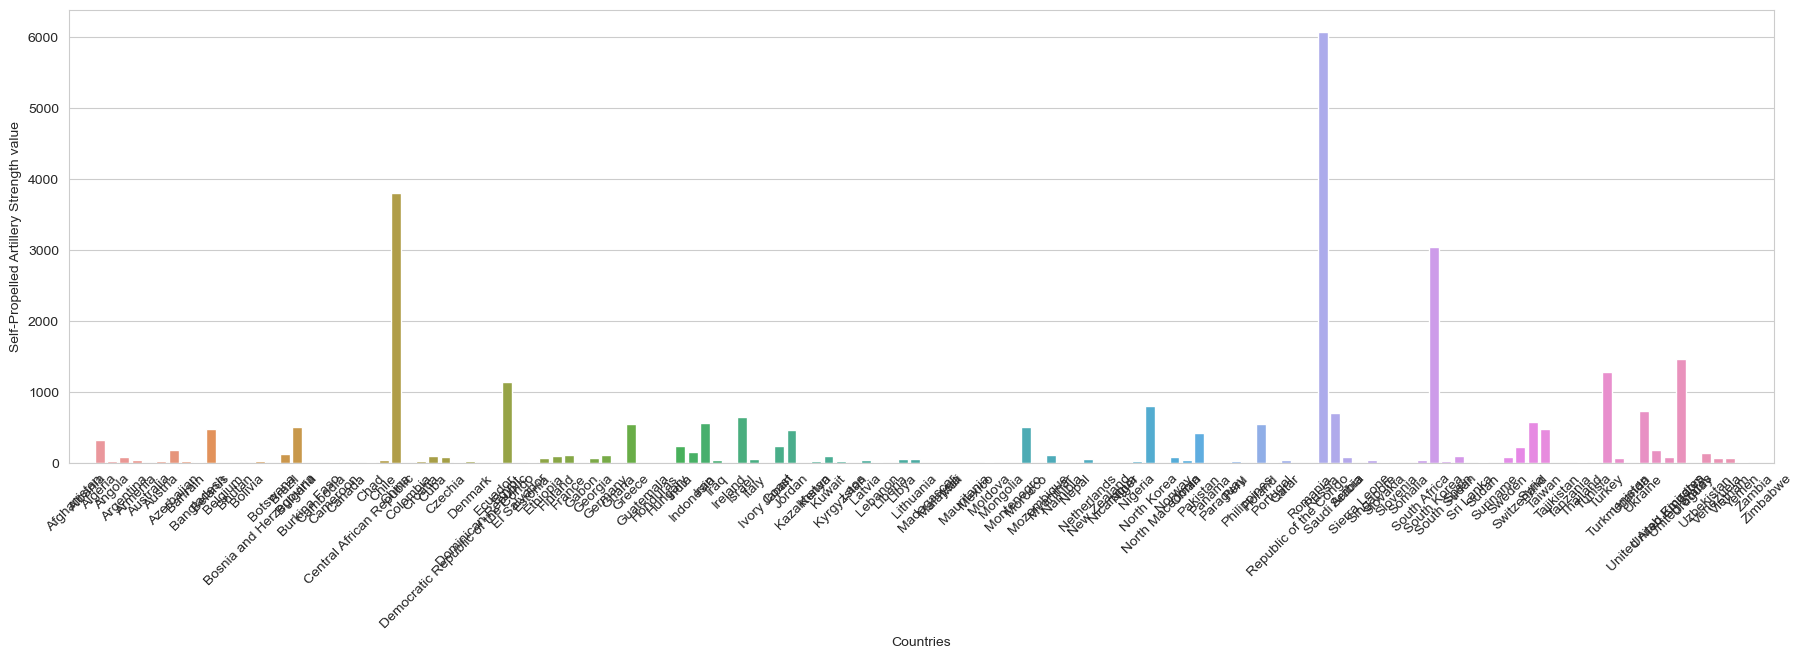

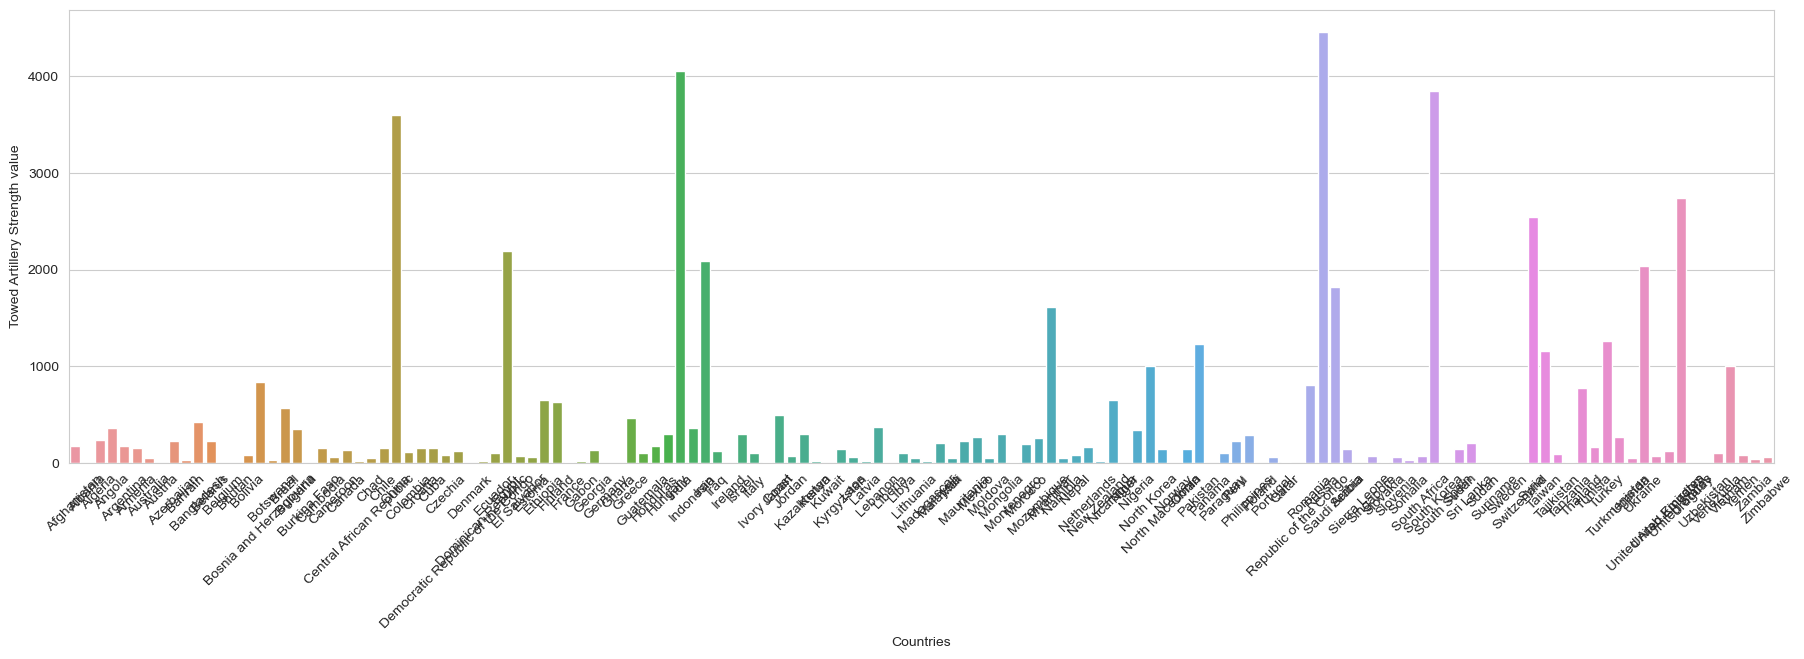

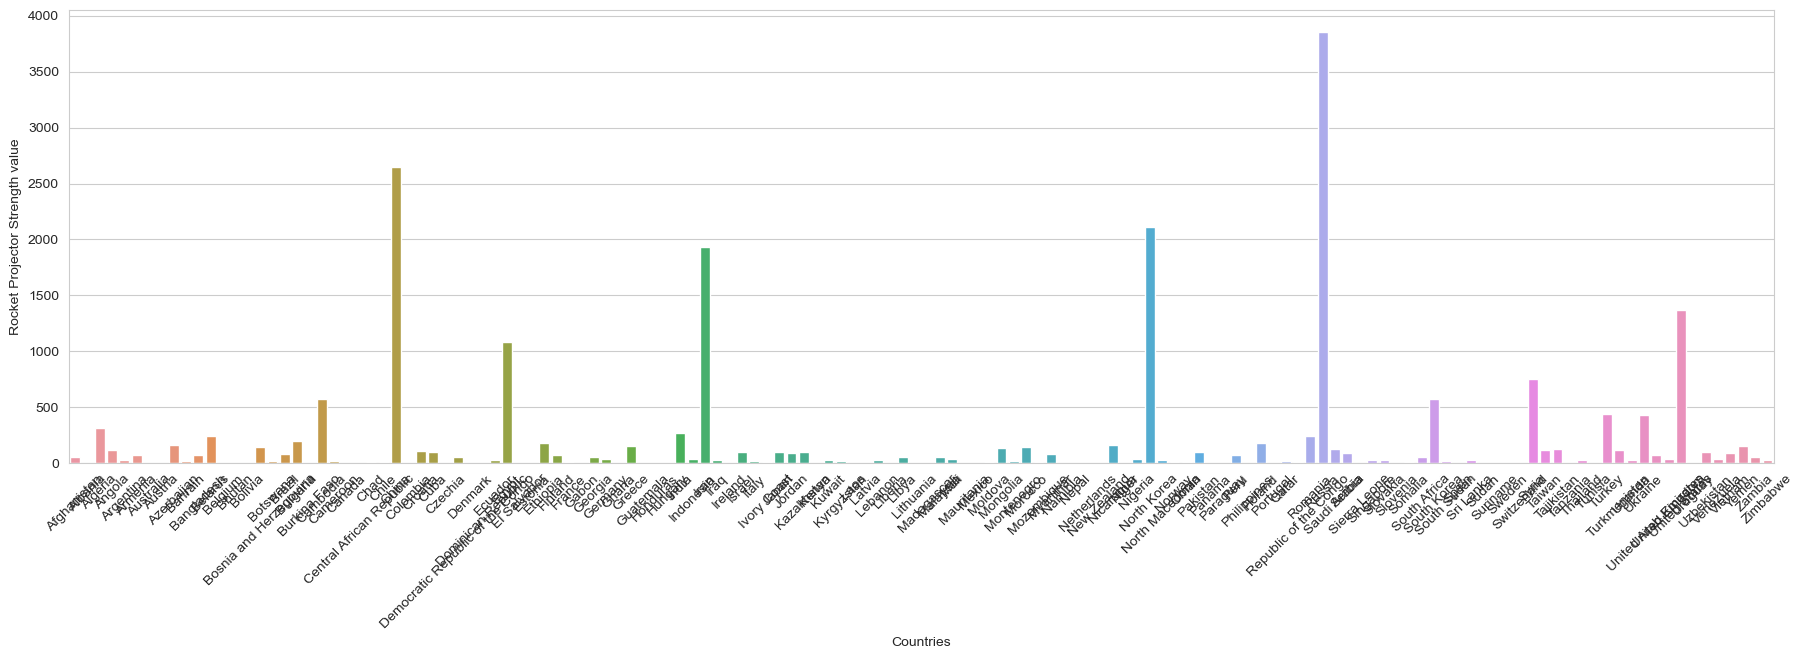

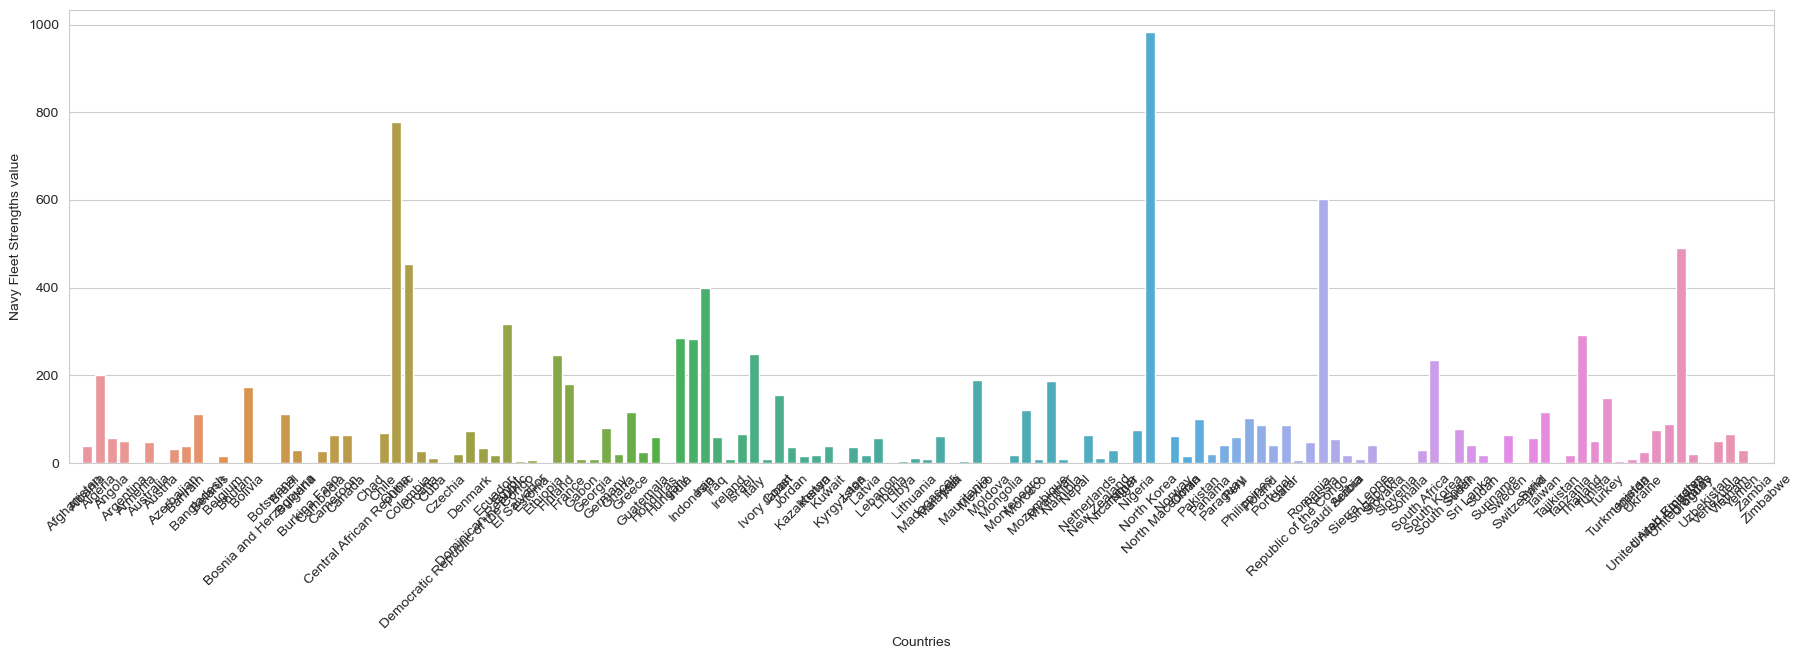

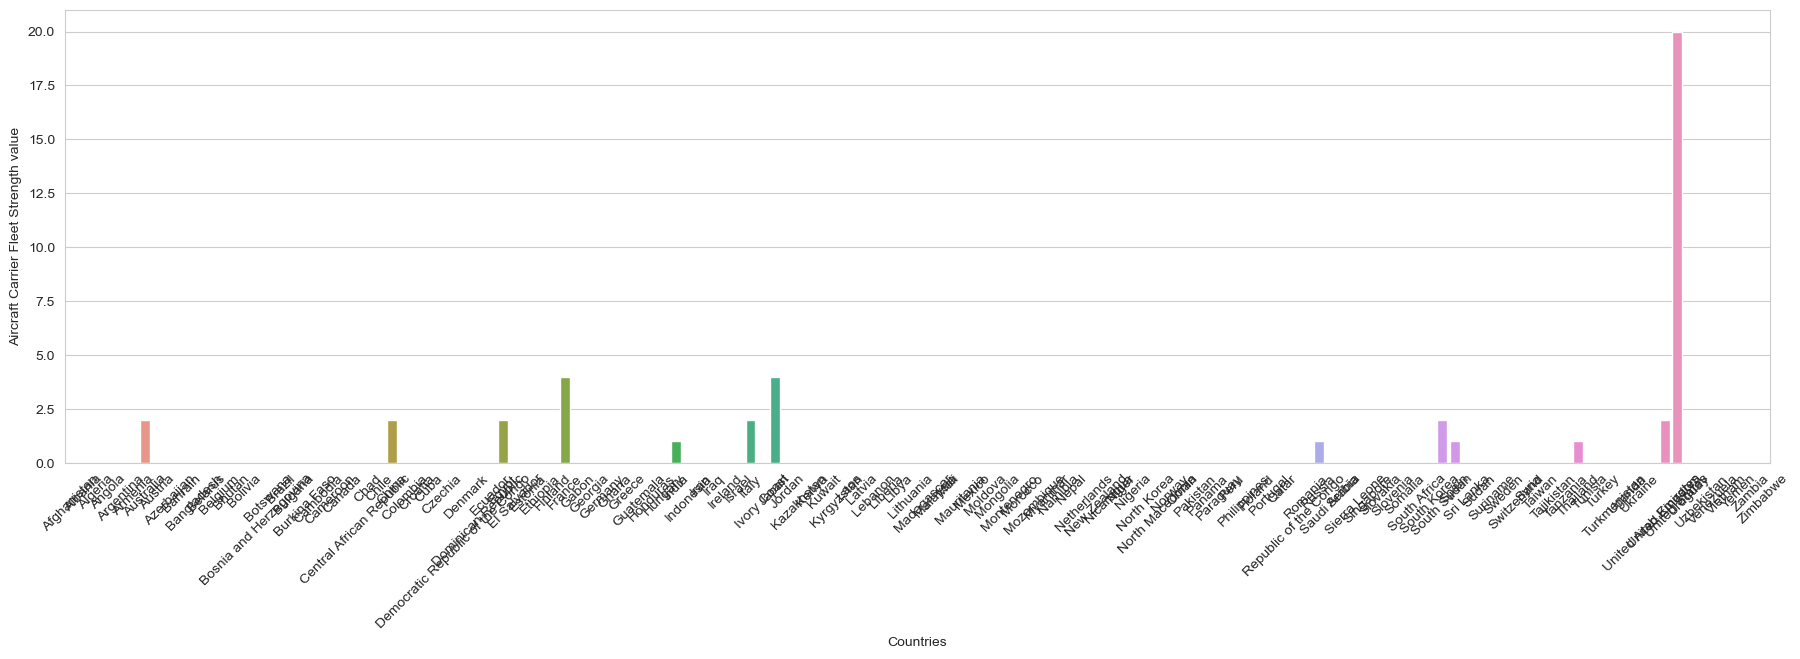

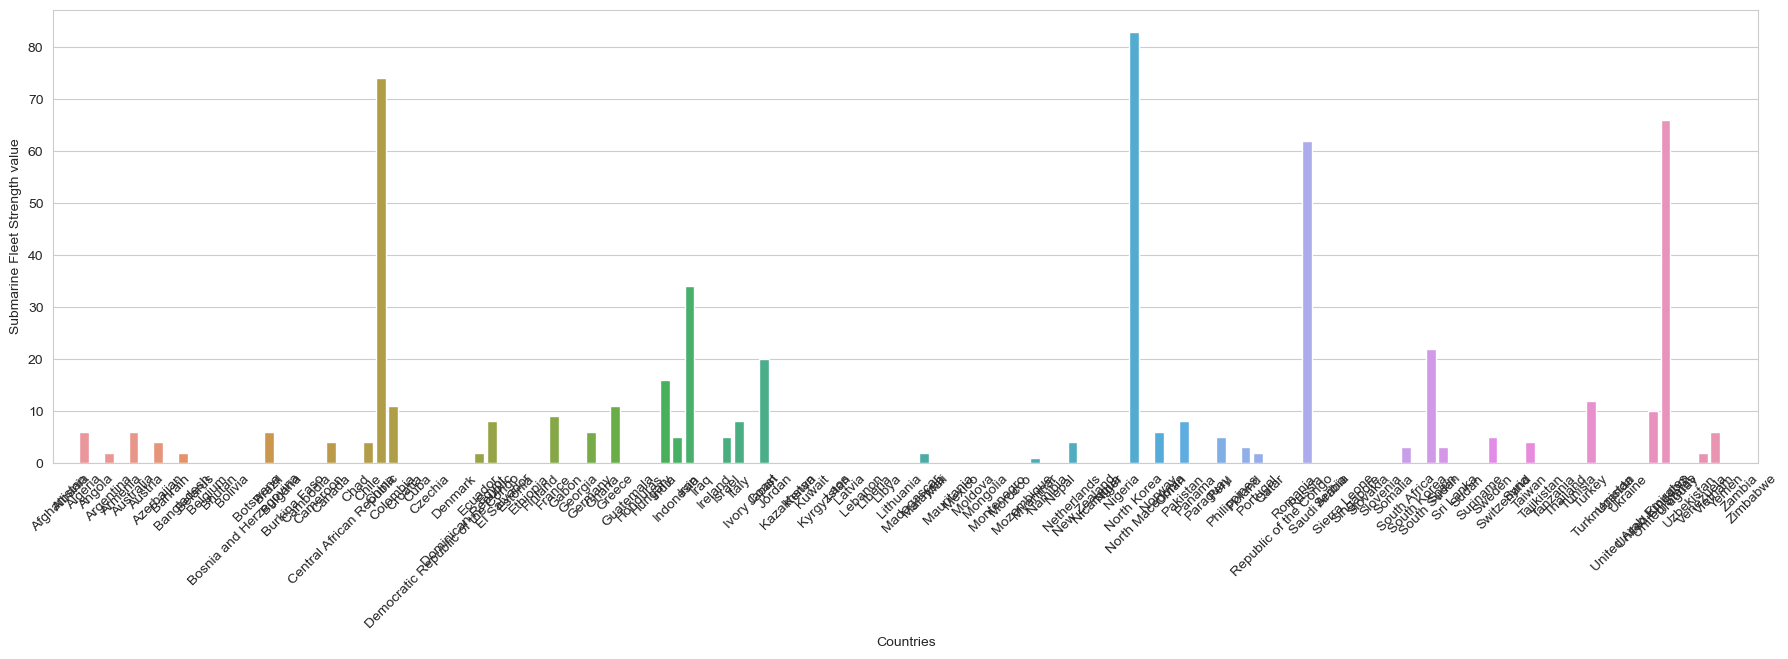

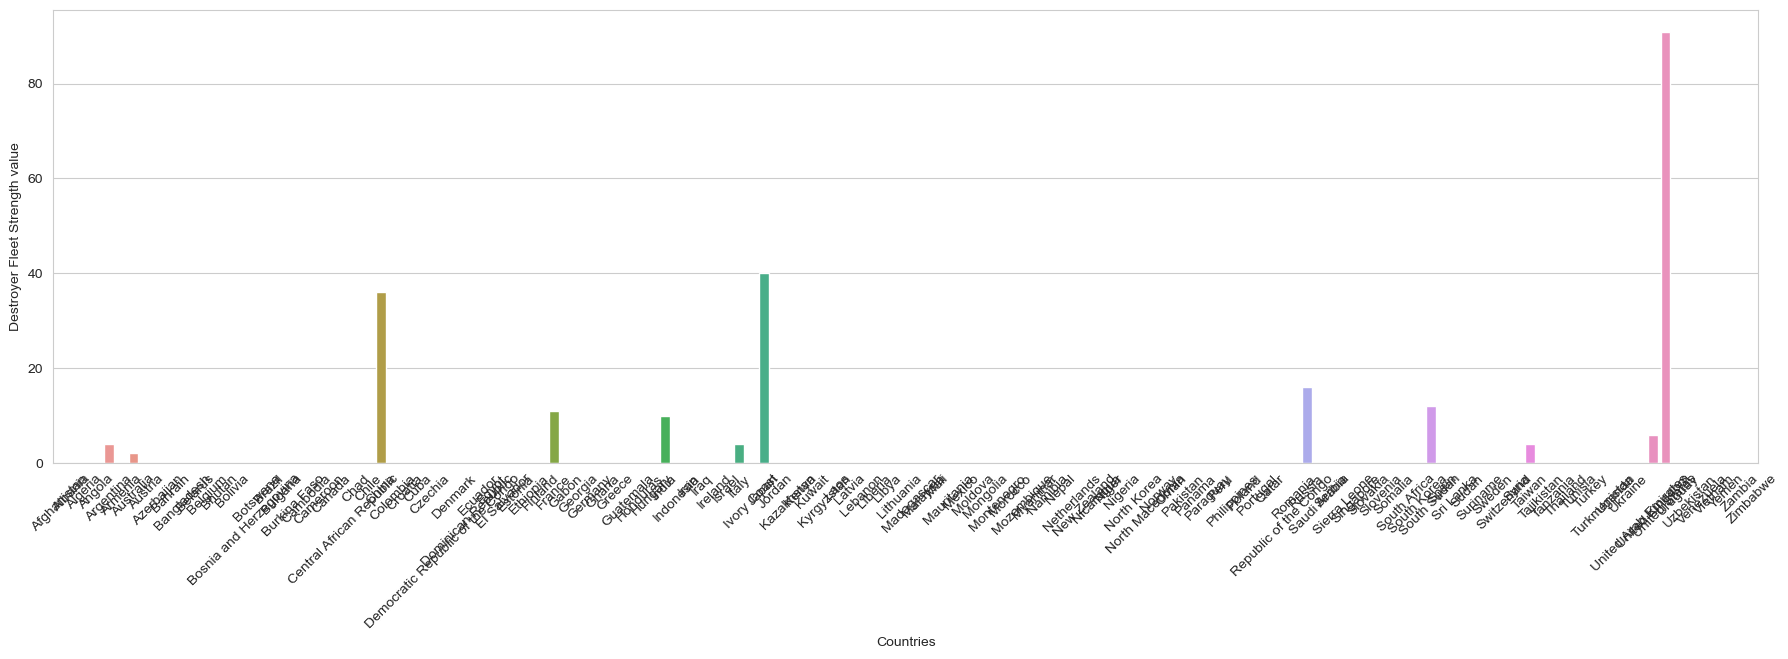

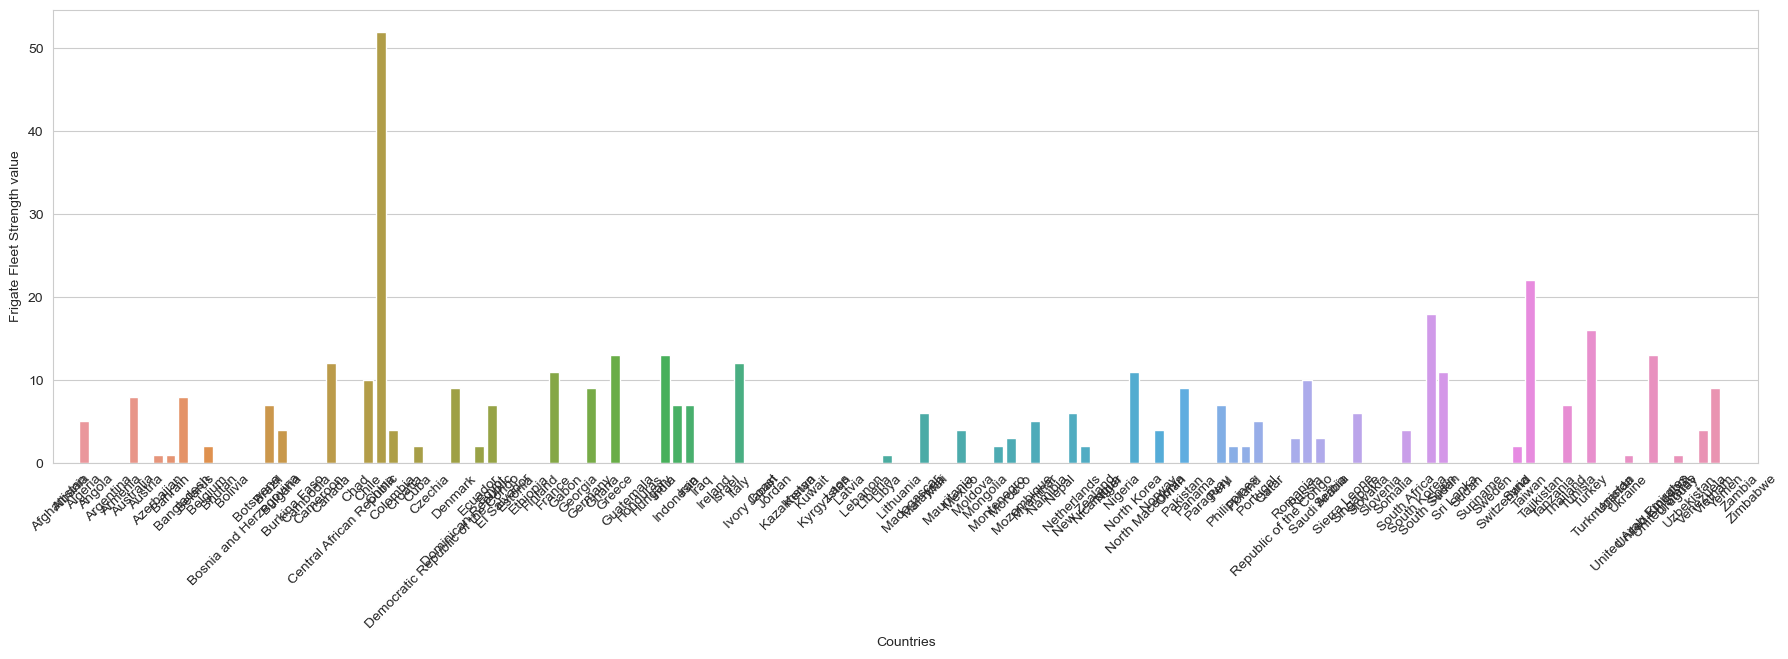

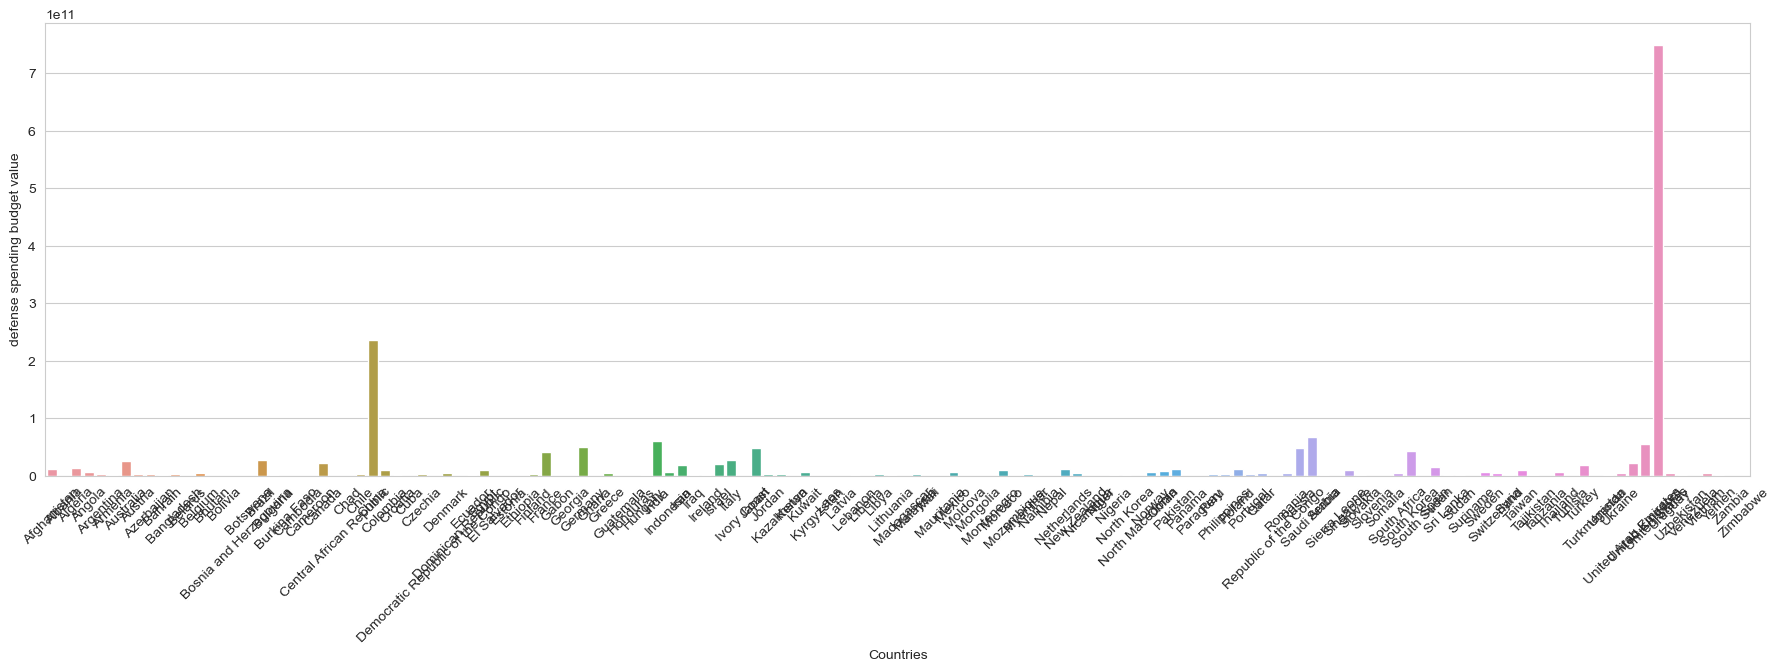

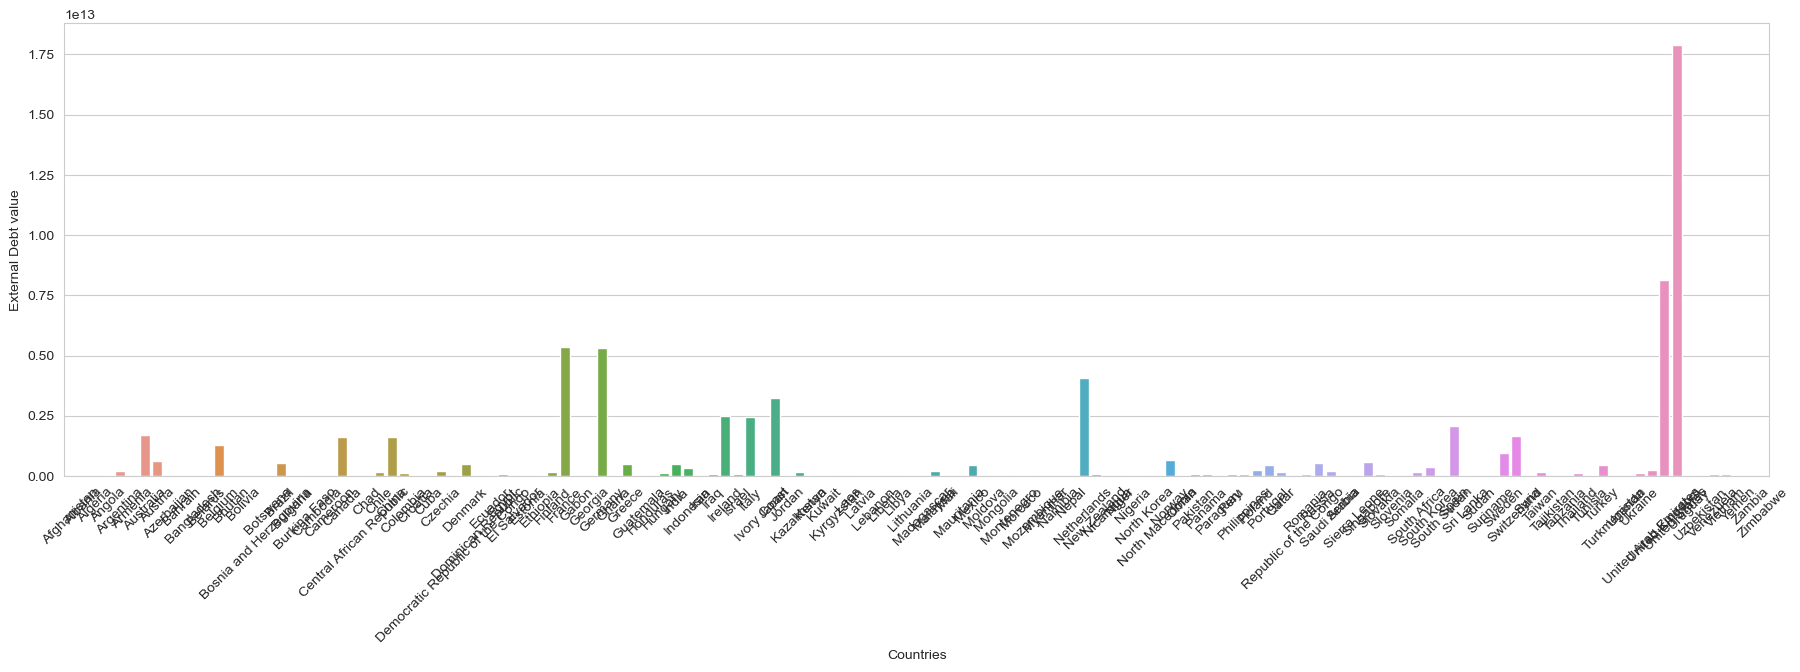

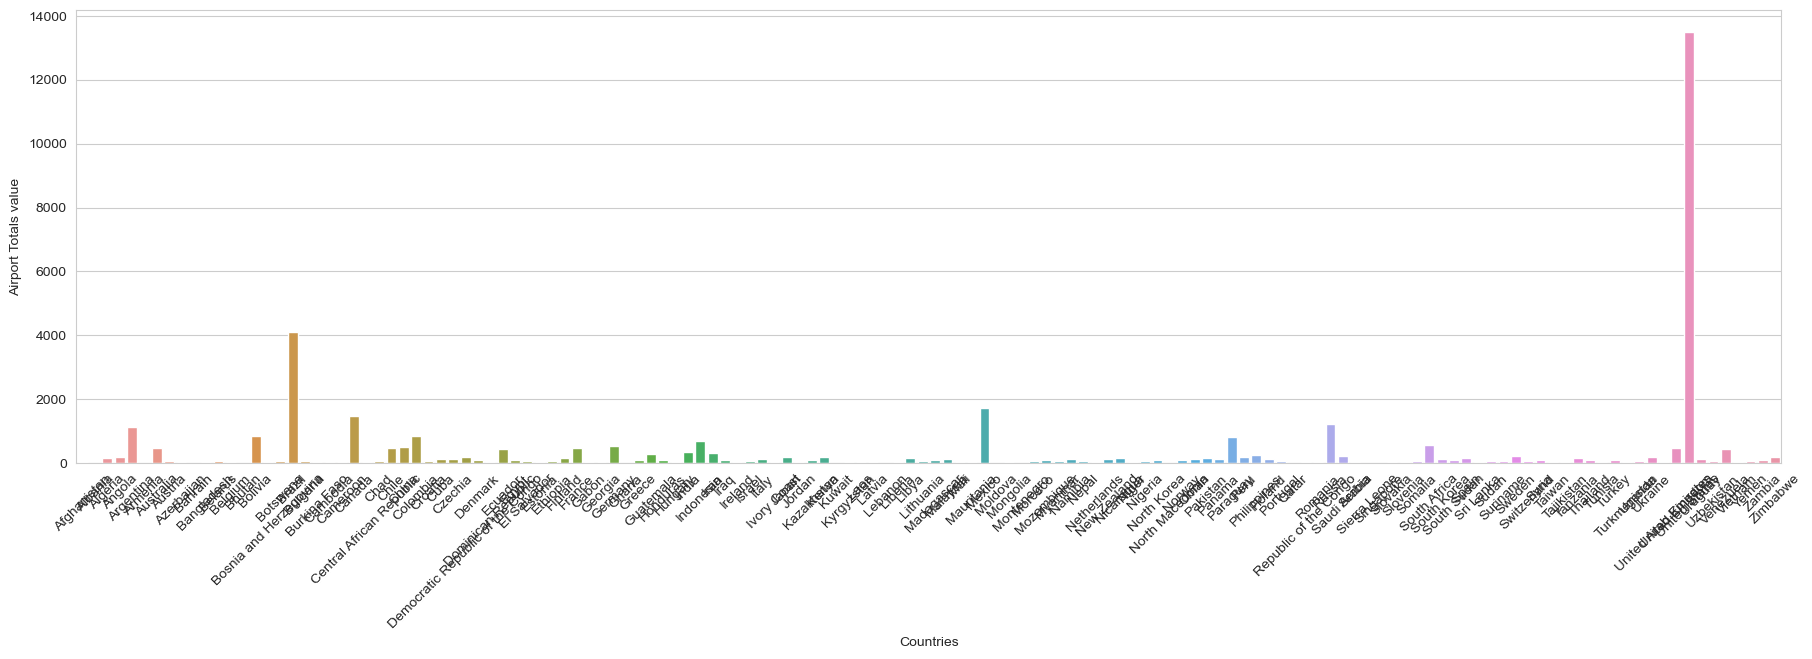

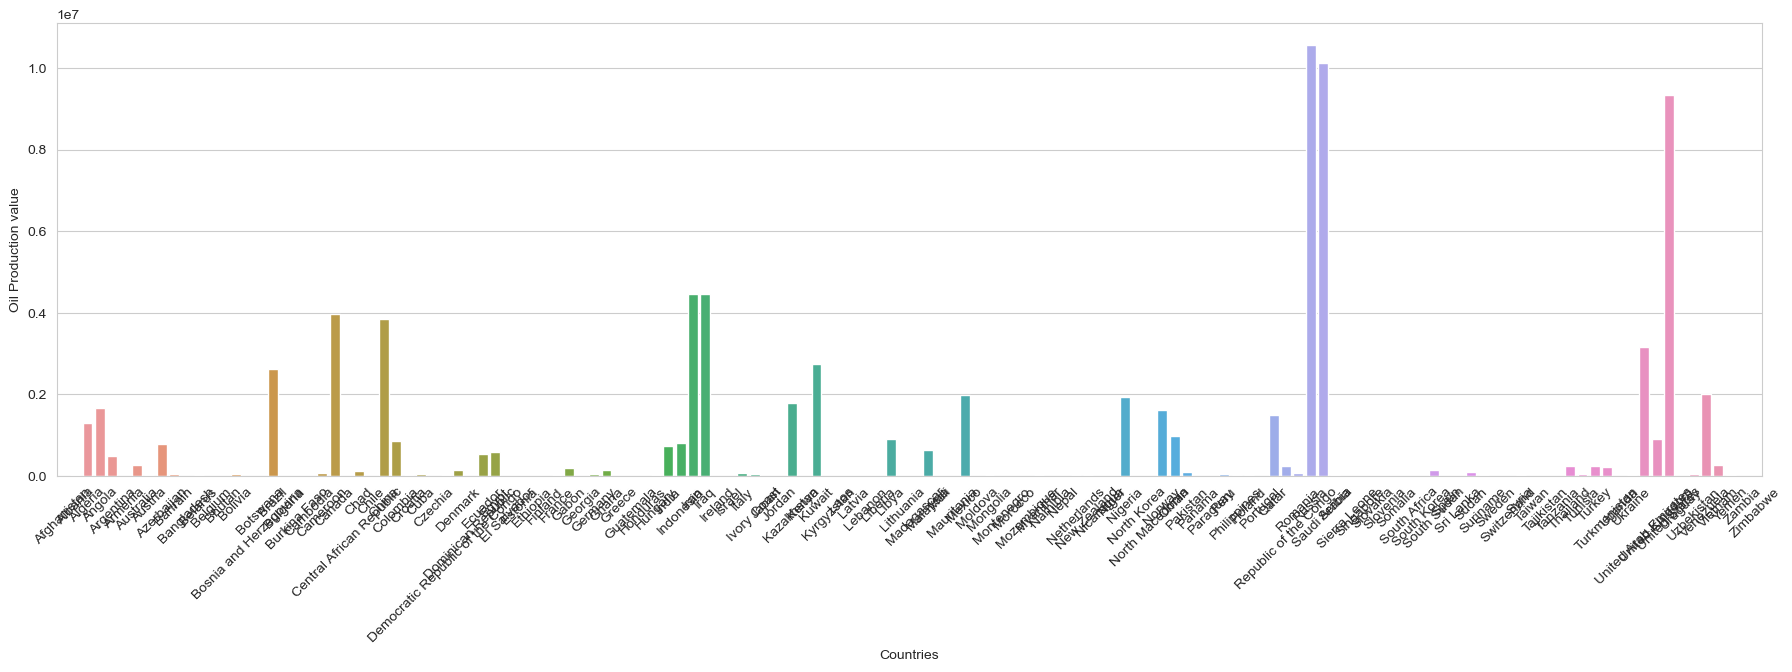

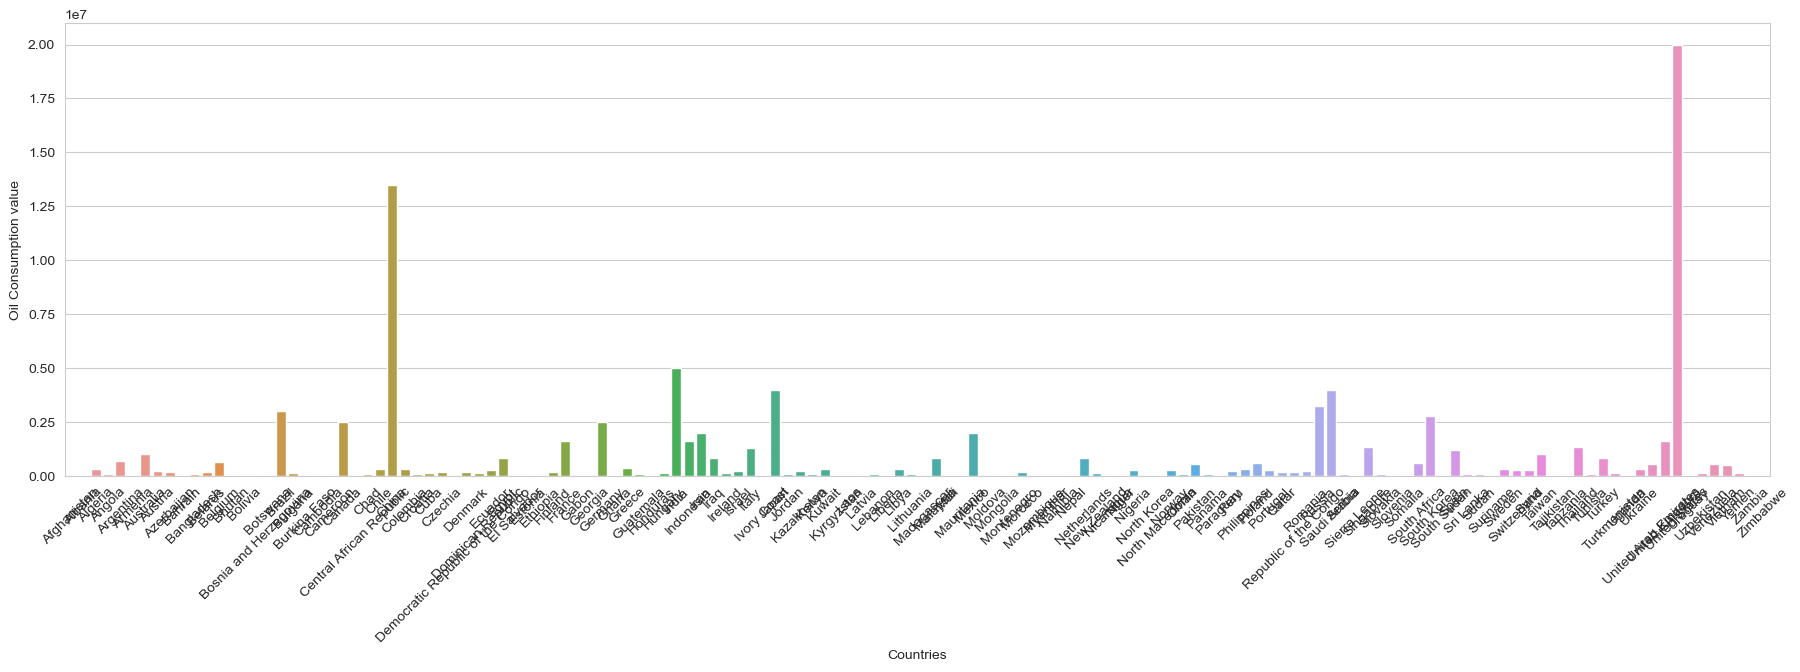

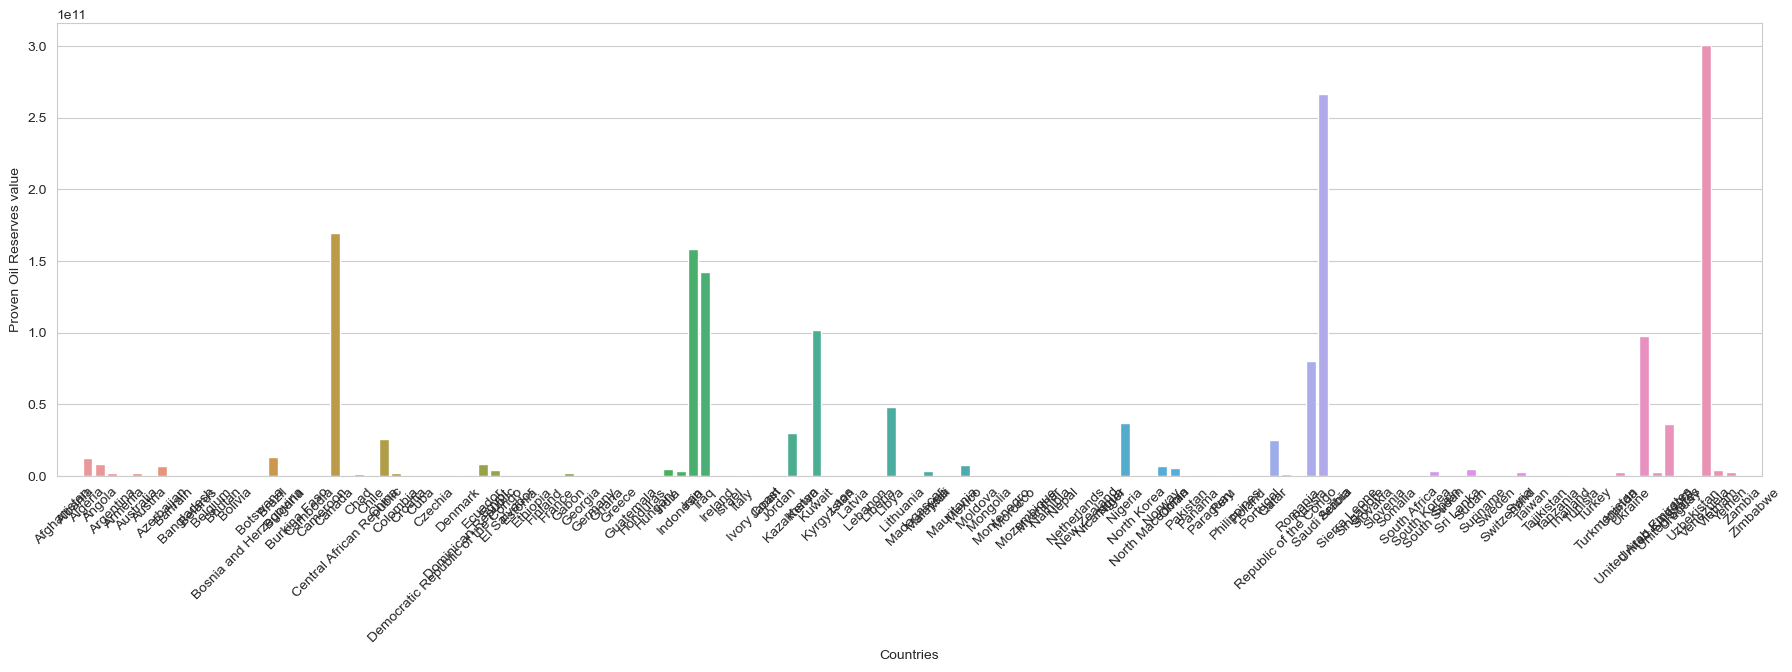

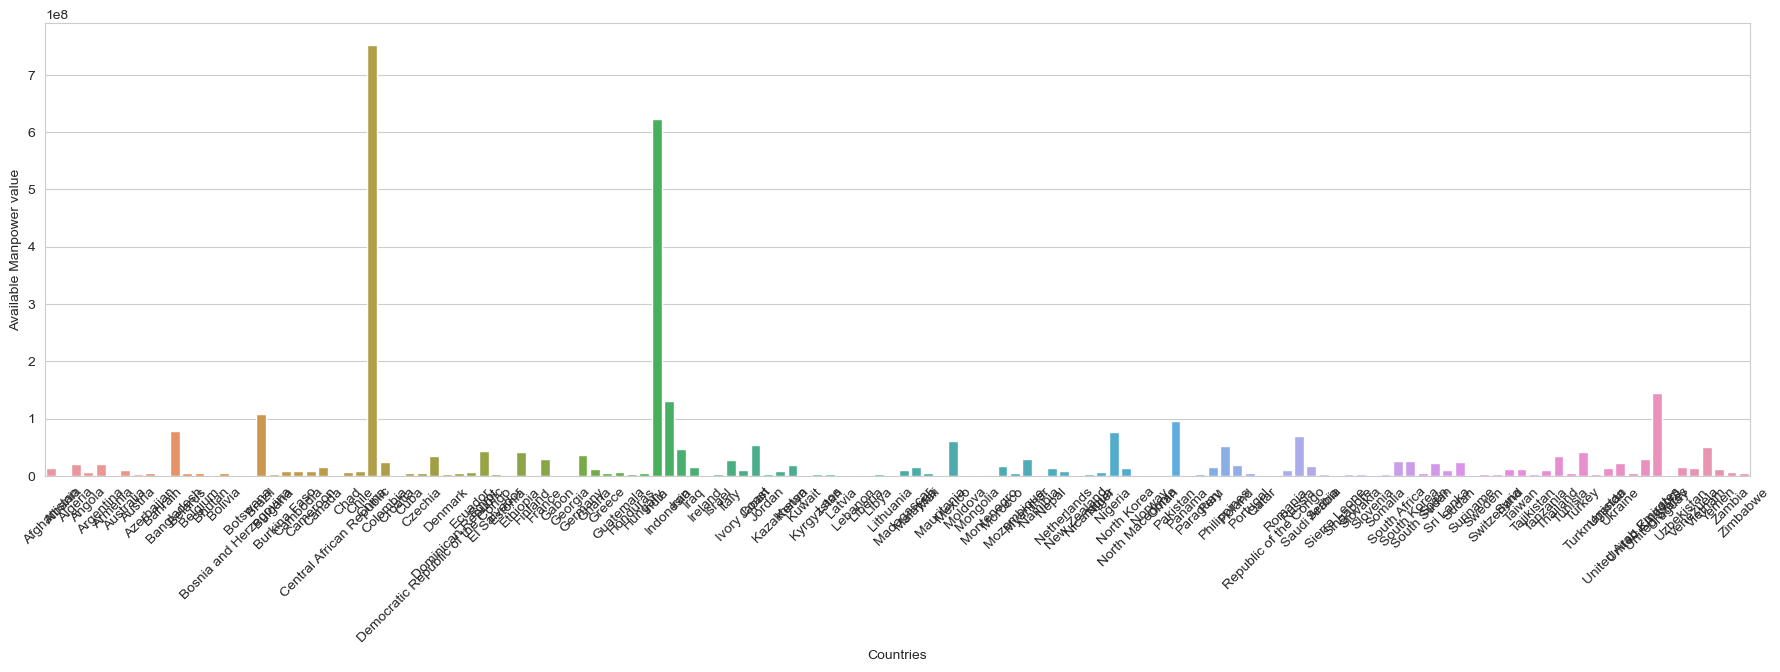

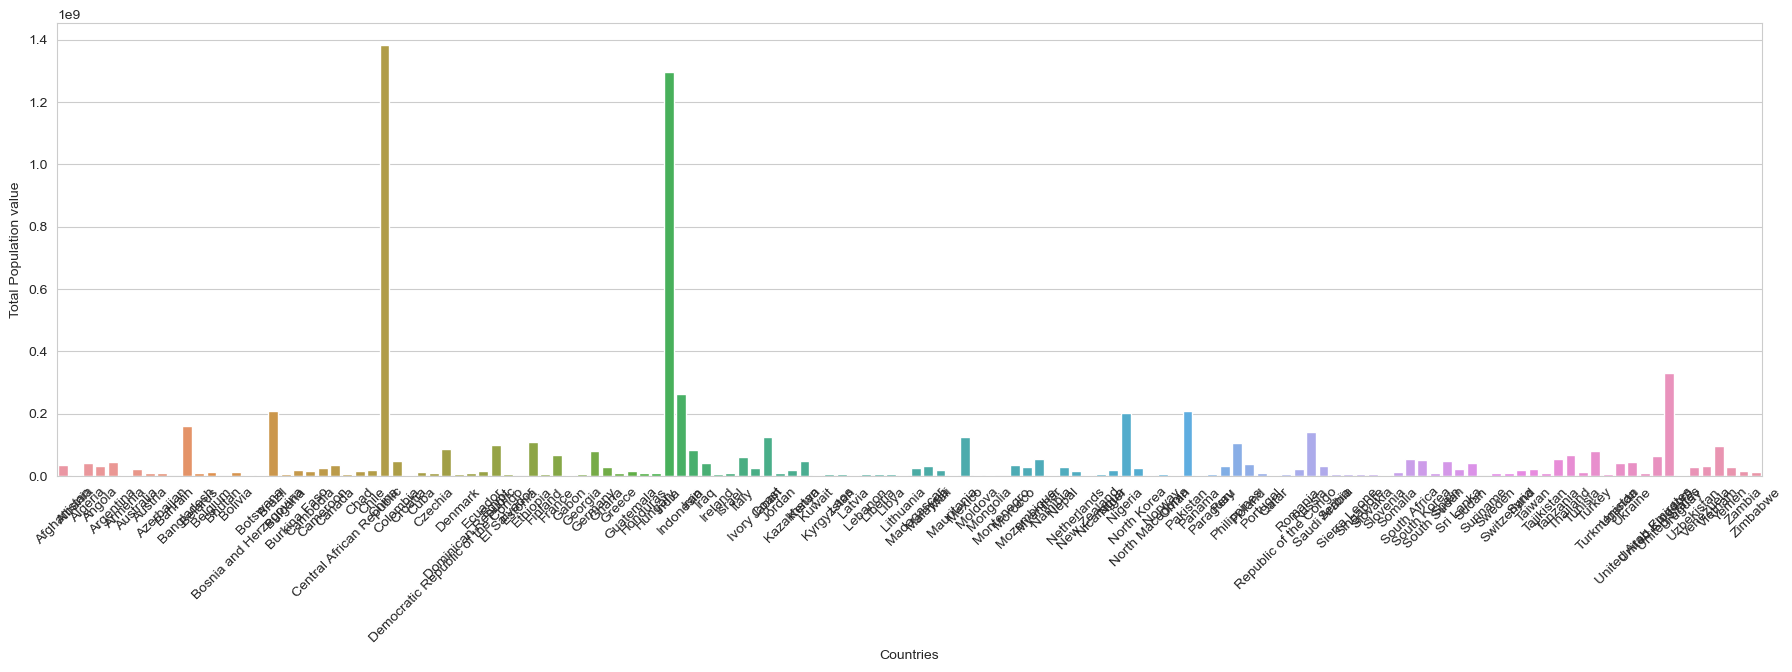

In [102]:
for col in df.columns[1:]:
    plt.figure(figsize = (22,6))
    sns.barplot(y = df[col], x = df.Countries, data = df)
    plt.xticks(rotation = 45);

In [28]:
# Görselleştirmeler sonucu China,Russia ve USA'in datada outlier değerleri bariz belirgin.

## Decriptive statistics

In [29]:
df.describe().T

count             mean               std           min            25%             50%              75%                max
Military Strength Power Index           138.000            1.461             1.324         0.061          0.575           1.034            2.022             10.168
Aircraft Strength value                 138.000          388.471          1231.982         0.000         33.000         111.000          290.250          13264.000
Fighter/Interceptor Strength value      138.000           81.565           230.325         0.000          0.000          17.000           60.500           2085.000
Attack Aircraft Strength value          138.000           25.761            94.528         0.000          0.000           0.000           15.750            742.000
Transport Aircraft Fleet Strength value 138.000           30.232            92.330         0.000          3.000           9.000           26.000            945.000
Trainer Aircraft Fleet value            138.000           82.833           240.804         0.000          4.250          26.000           79.250           2643.000
Helicopter Fleet Strength value         138.000          154.065           520.184         0.000         15.250          44.000          126.750           5768.000
Attack Helicopter Fleet Strength value  138.000           25.623            97.326         0.000          0.000           2.000           17.750            967.000
Tank Strength value                     138.000          646.565          1515.464         0.000         19.250         153.000          436.250          12950.000
AFV/APC Strength value                  138.000         2485.696          5410.546         0.000        250.250         734.500         2000.000          39253.000
Self-Propelled Artillery Strength value 138.000          212.159           688.029         0.000          0.000          23.000           97.250           6083.000
Towed Artillery Strength value          138.000          393.978           805.782         0.000         24.250         108.000          296.500           4465.000
Rocket Projector Strength value         138.000          156.935           484.381         0.000          0.000          24.000           99.750           3860.000
Navy Fleet Strengths value              138.000           76.362           140.822         0.000          5.250          30.000           72.750            984.000
Aircraft Carrier Fleet Strength value   138.000            0.319             1.804         0.000          0.000           0.000            0.000             20.000
Submarine Fleet Strength value          138.000            4.000            12.632         0.000          0.000           0.000            2.000             83.000
Destroyer Fleet Strength value          138.000            1.710             9.155         0.000          0.000           0.000            0.000             91.000
Frigate Fleet Strength value            138.000            2.935             6.057         0.000          0.000           0.000            4.000             52.000
defense spending budget value           138.000  13993631641.210   67311892724.125  13000000.000  325500000.000  2100908787.500   6957750000.000   750000000000.000
External Debt value                     138.000 519498263043.478 1847251527661.875 539400000.000 9361500000.000 39970000000.000 183025000000.000 17910000000000.000
Airport Totals value                    138.000          290.043          1212.967         2.000         33.500          68.000          150.750          13513.000
Oil Production value                    138.000       585552.355       1667138.897         0.000          0.000       13130.000       222860.000       10580000.000
Oil Consumption value                   138.000       702018.696       2168810.056      2000.000      32500.000      133500.000       348750.000       20000000.000
Proven Oil Reserves value               138.000  11944118420.290   42750903273.129         0.000          

# Data Preprocessing

In [30]:
X = df.drop(columns= "Countries",axis=1)

In [31]:
X.head()

Military Strength Power Index  Aircraft Strength value  Fighter/Interceptor Strength value  Attack Aircraft Strength value  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  Tank Strength value  AFV/APC Strength value  Self-Propelled Artillery Strength value  Towed Artillery Strength value  Rocket Projector Strength value  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  Destroyer Fleet Strength value  Frigate Fleet Strength value  defense spending budget value  External Debt value  Airport Totals value  Oil Production value  Oil Consumption value  Proven Oil Reserves value  Available Manpower value  Total Population value
0                          1.344                  260.000                               0.000                          25.000                                   30.000                         0.000                          187.000                                   0.000                0.000                1062.000                                    0.000                         176.000                           50.000                       0.000                                  0.000                           0.000                           0.000                         0.000                12000000000.000       2840000000.000                43.000                 0.000               5500.000                      0.000              14325743.000            34940837.000
1                          2.314                   19.000                               0.000                           0.000                                    0.000                         0.000                           19.000                                   0.000                0.000                 467.000                                    0.000                           0.000                            0.000                      38.000                                  0.000                           0.000                           0.000                         0.000                  250000000.000       9505000000.000                 4.000             16000.000              42500.000              168300000.000               1519438.000             3057220.000
2                          0.466                  551.000                             103.000                          22.000                                   59.000                        87.000                          257.000                                  45.000              880.000                7361.000                                  320.000                         240.000                          316.000                     201.000                                  0.000                           6.000                           0.000                         5.000                13000000000.000       6260000000.000               157.000           1306000.000             325000.000            12200000000.000              20741263.000            41657488.000
3                          0.838                  295.000                              72.000                          18.000                                   30.000                        47.000                          126.000                                  15.000              379.000                 595.000                                   28.000                         357.000                          115.000                      57.000                                  0.000                           0.000                           0.000                         0.000                 7000000000.000      42080000000.000               176.000           1666000.000              82300.000             8273000000.000               6244205.000            30355880.000
4                          0.652                  227.000                              24.000                    

Scaling Data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_scaled = scaler.fit_transform(X)

# Modelling

In [35]:
from sklearn.cluster import KMeans


## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [36]:
from pyclustertend import hopkins

In [37]:
hopkins(X,X.shape[0])

0.07140658156401902

In [38]:
hopkins(X_scaled,X_scaled.shape[0])

0.07442166803975821

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [39]:
ssd = []

K = range(2,9)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

### Model Building and label visualisation

Text(0.5, 1.0, 'elbow method')

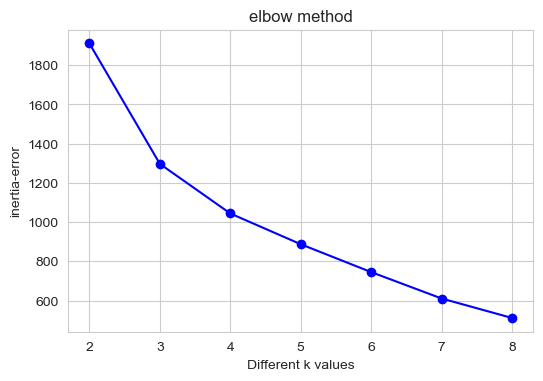

In [40]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [41]:
ssd


[1911.0076460430041,
 1296.9467409218043,
 1044.2015097931896,
 887.327821560553,
 745.2068066540269,
 610.6455812399118,
 511.3419393774911]

In [42]:
pd.Series(ssd).diff()

0        NaN
1   -614.061
2   -252.745
3   -156.874
4   -142.121
5   -134.561
6    -99.304
dtype: float64

In [43]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff # 3 teki azalış en keskin ilk azalış. n_clusters 3 seçilebilir.

0
1     NaN
2 614.061
3 252.745
4 156.874
5 142.121
6 134.561
7  99.304

<AxesSubplot:>

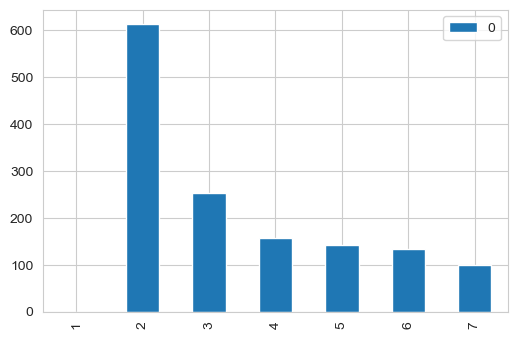

In [44]:
df_diff.plot(kind='bar')

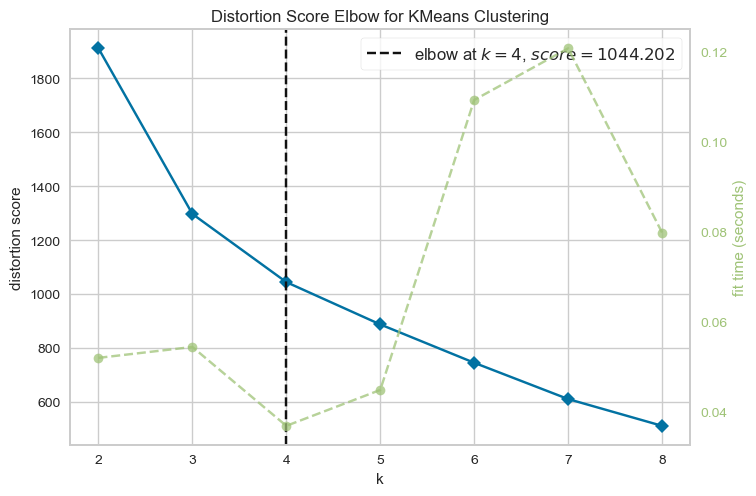

In [45]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

#### Silhouette analysis

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

# Her ne kadar 2 nin değeri 0.86 çıksada 3 ün değeri de 1' e çok yakın. 

For n_clusters=2, the silhouette score is 0.8635930041608607
For n_clusters=3, the silhouette score is 0.8181360267920251
For n_clusters=4, the silhouette score is 0.4866786063460757
For n_clusters=5, the silhouette score is 0.5090371213213999
For n_clusters=6, the silhouette score is 0.5099407976429824
For n_clusters=7, the silhouette score is 0.47549187252626846
For n_clusters=8, the silhouette score is 0.46564969139552


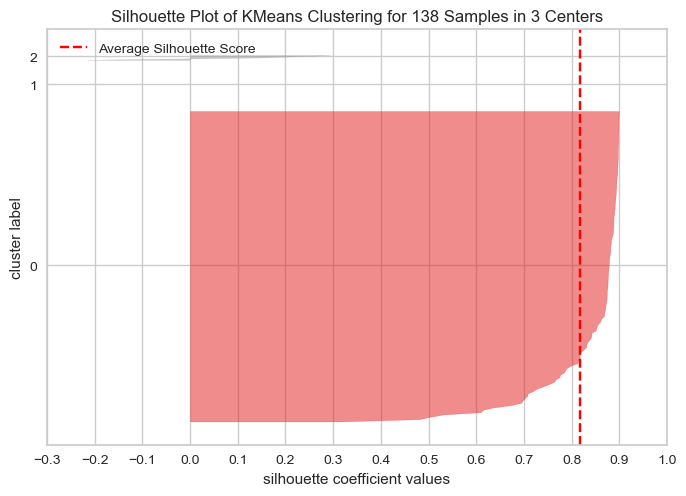

In [48]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

#### Final(Cluster = 3 için)

In [49]:
final_model = KMeans(n_clusters=3, random_state=42)
final_model.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [50]:
clusters = final_model.labels_
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [51]:
df["pred_clusters"] = pd.DataFrame(clusters)

In [52]:
df.head()

Countries  Military Strength Power Index  Aircraft Strength value  Fighter/Interceptor Strength value  Attack Aircraft Strength value  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  Tank Strength value  AFV/APC Strength value  Self-Propelled Artillery Strength value  Towed Artillery Strength value  Rocket Projector Strength value  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  Destroyer Fleet Strength value  Frigate Fleet Strength value  defense spending budget value  External Debt value  Airport Totals value  Oil Production value  Oil Consumption value  Proven Oil Reserves value  Available Manpower value  Total Population value  pred_clusters
0  Afghanistan                          1.344                  260.000                               0.000                          25.000                                   30.000                         0.000                          187.000                                   0.000                0.000                1062.000                                    0.000                         176.000                           50.000                       0.000                                  0.000                           0.000                           0.000                         0.000                12000000000.000       2840000000.000                43.000                 0.000               5500.000                      0.000              14325743.000            34940837.000              0
1      Albania                          2.314                   19.000                               0.000                           0.000                                    0.000                         0.000                           19.000                                   0.000                0.000                 467.000                                    0.000                           0.000                            0.000                      38.000                                  0.000                           0.000                           0.000                         0.000                  250000000.000       9505000000.000                 4.000             16000.000              42500.000              168300000.000               1519438.000             3057220.000              0
2      Algeria                          0.466                  551.000                             103.000                          22.000                                   59.000                        87.000                          257.000                                  45.000              880.000                7361.000                                  320.000                         240.000                          316.000                     201.000                                  0.000                           6.000                           0.000                         5.000                13000000000.000       6260000000.000               157.000           1306000.000             325000.000            12200000000.000              20741263.000            41657488.000              0
3       Angola                          0.838                  295.000                              72.000                          18.000                                   30.000                        47.000                          126.000                                  15.000              379.000                 595.000                                   28.000                         357.000                          115.000                      57.000                                  0.000                           0.000                           0.000                         0.000                 7000000000.000      42080000000.000               176.000           1666000.000              82300.000             8273000000.000               6244205.000            303

In [ ]:
df[df.pred_clusters == 0][["Countries"]]

In [54]:
df[df.pred_clusters == 1][["Countries"]]

Countries
130  United States

In [55]:
df[df.pred_clusters == 2][["Countries"]]

Countries
26      China
49      India
101    Russia

#### Final(Cluster = 2 için)

In [58]:
final_model1 = KMeans(n_clusters=2, random_state=42)
final_model1.fit_predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1])

In [59]:
clusters1 = final_model1.labels_
clusters1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1])

In [60]:
df["pred_clusters1"] = pd.DataFrame(clusters1)

In [ ]:
df[df.pred_clusters1 ==1][["Countries"]]

In [62]:
df[df.pred_clusters1 ==0][["Countries"]]


Countries
26           China
101         Russia
130  United States

In [ ]:
#Clusters 2 ve 3 için büyük çoğunluk tek sınıfta toplandı. 
#Görselleştirme kısmında dikkat çeken Çin,Rusya ve USA her iki denemede de tek sınıf olarak çıktı.
#Bu üç ülkyi datadan silerek tekrar K-Means denemesine karar verdim.

### Drop China,Russia,USA

In [94]:
df2 = pd.read_csv("Military.csv")

In [95]:
df2.drop(index=[26,101,130],inplace=True)

In [98]:
df2 = df2.reset_index(drop=True)

In [99]:
X2 = df2.drop(columns= "Countries",axis=1)

In [100]:
X2.head()

Military Strength Power Index  Aircraft Strength value  Fighter/Interceptor Strength value  Attack Aircraft Strength value  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  Tank Strength value  AFV/APC Strength value  Self-Propelled Artillery Strength value  Towed Artillery Strength value  Rocket Projector Strength value  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  Destroyer Fleet Strength value  Frigate Fleet Strength value  defense spending budget value  External Debt value  Airport Totals value  Oil Production value  Oil Consumption value  Proven Oil Reserves value  Available Manpower value  Total Population value
0                          1.344                  260.000                               0.000                          25.000                                   30.000                         0.000                          187.000                                   0.000                0.000                1062.000                                    0.000                         176.000                           50.000                       0.000                                  0.000                           0.000                           0.000                         0.000                12000000000.000       2840000000.000                43.000                 0.000               5500.000                      0.000              14325743.000            34940837.000
1                          2.314                   19.000                               0.000                           0.000                                    0.000                         0.000                           19.000                                   0.000                0.000                 467.000                                    0.000                           0.000                            0.000                      38.000                                  0.000                           0.000                           0.000                         0.000                  250000000.000       9505000000.000                 4.000             16000.000              42500.000              168300000.000               1519438.000             3057220.000
2                          0.466                  551.000                             103.000                          22.000                                   59.000                        87.000                          257.000                                  45.000              880.000                7361.000                                  320.000                         240.000                          316.000                     201.000                                  0.000                           6.000                           0.000                         5.000                13000000000.000       6260000000.000               157.000           1306000.000             325000.000            12200000000.000              20741263.000            41657488.000
3                          0.838                  295.000                              72.000                          18.000                                   30.000                        47.000                          126.000                                  15.000              379.000                 595.000                                   28.000                         357.000                          115.000                      57.000                                  0.000                           0.000                           0.000                         0.000                 7000000000.000      42080000000.000               176.000           1666000.000              82300.000             8273000000.000               6244205.000            30355880.000
4                          0.652                  227.000                              24.000                    

In [101]:
scaler2 = StandardScaler()

In [102]:
X_scaled2 = scaler2.fit_transform(X2)

In [103]:
hopkins(X2,X2.shape[0])

0.1079544491955776

In [104]:
hopkins(X_scaled2,X_scaled2.shape[0])

0.11733164986302415

In [105]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_scaled2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

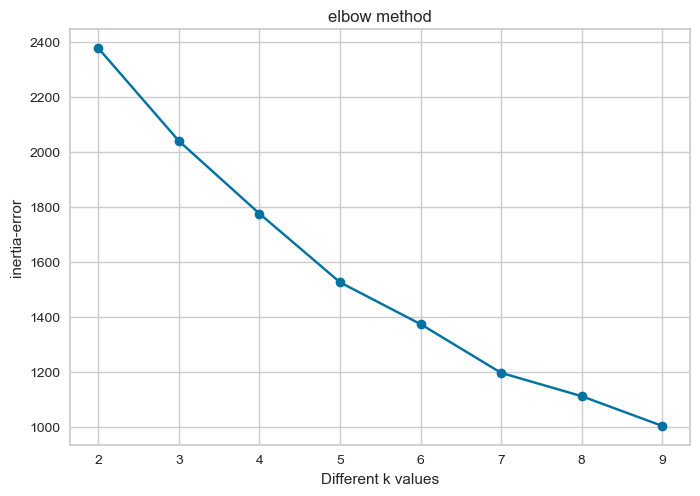

In [106]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [107]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1     NaN
2 337.307
3 263.918
4 249.856
5 151.930
6 177.234
7  84.851
8 108.009

<AxesSubplot:>

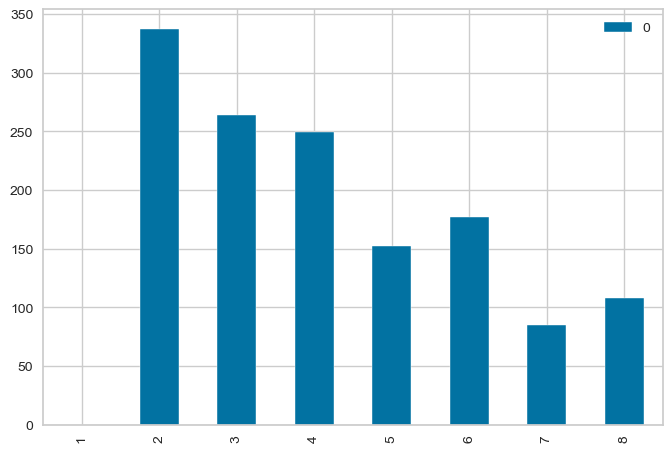

In [108]:
df_diff.plot(kind='bar')

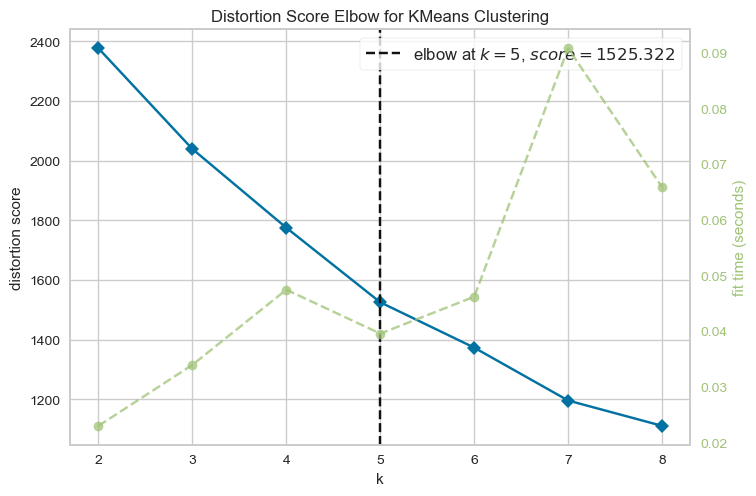

In [109]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled2)        # Fit the data to the visualizer
visualizer.show();

In [110]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6503236041299917
For n_clusters=3, the silhouette score is 0.6292219315231377
For n_clusters=4, the silhouette score is 0.6189055870668957
For n_clusters=5, the silhouette score is 0.47139462723993164
For n_clusters=6, the silhouette score is 0.4284375592193028
For n_clusters=7, the silhouette score is 0.3983835099583552
For n_clusters=8, the silhouette score is 0.4039780481659355


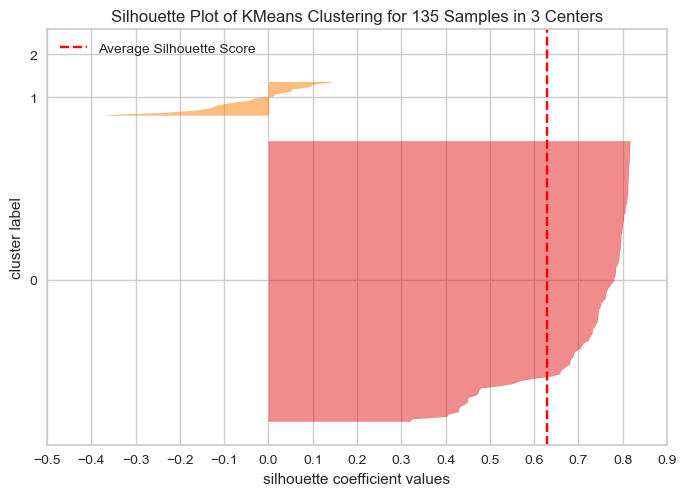

In [111]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled2)    # Fit the data to the visualizer
visualizer.poof();

#### Final model(Çin,Rusya,USA olmayan veri)

In [112]:
final_model2 = KMeans(n_clusters=3, random_state=42)
final_model2.fit_predict(X_scaled2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [113]:
clusters2 = final_model2.labels_
clusters2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [114]:
df2["pred_clusters"] = pd.DataFrame(clusters2)

In [115]:
df2[df2.pred_clusters ==0][["Countries"]]

Countries
0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                           Argentina
5                             Armenia
6                           Australia
7                             Austria
8                          Azerbaijan
9                             Bahrain
10                         Bangladesh
11                            Belarus
12                            Belgium
13                             Bhutan
14                            Bolivia
15             Bosnia and Herzegovina
16                           Botswana
18                           Bulgaria
19                       Burkina Faso
20                           Cambodia
21                           Cameroon
22                             Canada
23           Central African Republic
24                               Chad
25                              Chile
26                           Colombia
27                            Croatia
28                               Cuba
29                            Czechia
30   Democratic Republic of the Congo
31                            Denmark
32                 Dominican Republic
33                            Ecuador
35                        El Salvador
36                            Estonia
37                           Ethiopia
38                            Finland
40                              Gabon
41                            Georgia
43                              Ghana
44                             Greece
45                          Guatemala
46                           Honduras
47                            Hungary
49                          Indonesia
51                               Iraq
52                            Ireland
55                        Ivory Coast
57                             Jordan
58                         Kazakhstan
59                              Kenya
60                             Kuwait
61                         Kyrgyzstan
62                               Laos
63                             Latvia
64                            Lebanon
65                            Liberia
66                              Libya
67                          Lithuania
68                         Madagascar
69                           Malaysia
70                               Mali
71                         Mauritania
72                             Mexico
73                            Moldova
74                           Mongolia
75                         Montenegro
76                            Morocco
77                         Mozambique
78                            Myanmar
79                            Namibia
80                              Nepal
81                        Netherlands
82                        New Zealand
83                          Nicaragua
84                              Niger
85                            Nigeria
87                    North Macedonia
88                             Norway
89                               Oman
91                             Panama
92                           Paraguay
93                               Peru
94                        Philippines
95                             Poland
96                           Portugal
97                              Qatar
98              Republic of the Congo
99                            Romania
101                            Serbia
102                      Sierra Leone
103                         Singapore
104                          Slovakia
105                          Slovenia
106                           Somalia
107                      South Africa
109                       South Sudan
110                             Spain
111                         Sri Lanka
112                             Sudan
113                          Suriname
114                            Sweden
115                       Switzerland
116                             Syria
118                        Tajikistan


In [116]:
df2[df2.pred_clusters ==1][["Countries"]]

Countries
17           Brazil
34            Egypt
39           France
42          Germany
50             Iran
53           Israel
54            Italy
56            Japan
86      North Korea
90         Pakistan
100    Saudi Arabia
108     South Korea
117          Taiwan
122          Turkey
127  United Kingdom

In [117]:
df2[df2.pred_clusters ==2][["Countries"]]

Countries
48     India

In [118]:
final_model3 = KMeans(n_clusters=2, random_state=42)
final_model3.fit_predict(X_scaled2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [119]:
clusters3 = final_model3.labels_
clusters3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [120]:
df2["pred_clusters2"] = pd.DataFrame(clusters3)

In [121]:
df2[df2.pred_clusters2 ==0][["Countries"]]

Countries
0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                           Argentina
5                             Armenia
6                           Australia
7                             Austria
8                          Azerbaijan
9                             Bahrain
10                         Bangladesh
11                            Belarus
12                            Belgium
13                             Bhutan
14                            Bolivia
15             Bosnia and Herzegovina
16                           Botswana
18                           Bulgaria
19                       Burkina Faso
20                           Cambodia
21                           Cameroon
22                             Canada
23           Central African Republic
24                               Chad
25                              Chile
26                           Colombia
27                            Croatia
28                               Cuba
29                            Czechia
30   Democratic Republic of the Congo
31                            Denmark
32                 Dominican Republic
33                            Ecuador
35                        El Salvador
36                            Estonia
37                           Ethiopia
38                            Finland
40                              Gabon
41                            Georgia
43                              Ghana
44                             Greece
45                          Guatemala
46                           Honduras
47                            Hungary
49                          Indonesia
51                               Iraq
52                            Ireland
53                             Israel
55                        Ivory Coast
57                             Jordan
58                         Kazakhstan
59                              Kenya
60                             Kuwait
61                         Kyrgyzstan
62                               Laos
63                             Latvia
64                            Lebanon
65                            Liberia
66                              Libya
67                          Lithuania
68                         Madagascar
69                           Malaysia
70                               Mali
71                         Mauritania
72                             Mexico
73                            Moldova
74                           Mongolia
75                         Montenegro
76                            Morocco
77                         Mozambique
78                            Myanmar
79                            Namibia
80                              Nepal
81                        Netherlands
82                        New Zealand
83                          Nicaragua
84                              Niger
85                            Nigeria
87                    North Macedonia
88                             Norway
89                               Oman
91                             Panama
92                           Paraguay
93                               Peru
94                        Philippines
95                             Poland
96                           Portugal
97                              Qatar
98              Republic of the Congo
99                            Romania
101                            Serbia
102                      Sierra Leone
103                         Singapore
104                          Slovakia
105                          Slovenia
106                           Somalia
107                      South Africa
109                       South Sudan
110                             Spain
111                         Sri Lanka
112                             Sudan
113                          Suriname
114                            Sweden
115                       Switzerland
116                             Syria


In [122]:
df2[df2.pred_clusters2 ==1][["Countries"]]

Countries
17           Brazil
34            Egypt
39           France
42          Germany
48            India
50             Iran
54            Italy
56            Japan
86      North Korea
90         Pakistan
100    Saudi Arabia
108     South Korea
117          Taiwan
122          Turkey
127  United Kingdom

### Evaluate 

In [ ]:
# Outlier değerlere sahip ülkeler çıkarıldıktan sonra yapılan sınıflandırmanın çıkarılmadan yapılandan daha iyi olduğunu değerlendirdim.
# Son yaptığım kısımda 3 cluster ve 2 cluster ın tek farkı India'nın ayrışması oldu. India'da belki silinen üçlüye eklenebilirdi. 

## Hierarchical Clustering

## Scaling Data

In [130]:
df3 = pd.read_csv("Military.csv")

In [146]:
X = df3.drop("Countries",axis=1)

In [147]:
scaler3 = StandardScaler()

In [148]:
X_scaled3 = scaler3.fit_transform(X)

### Dendogram

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [150]:
hc_ward = linkage(y = X_scaled3, method = "ward")
hc_complete = linkage(X_scaled3, "complete")
hc_average = linkage(X_scaled3, "average")
hc_single = linkage(X_scaled3, "single")

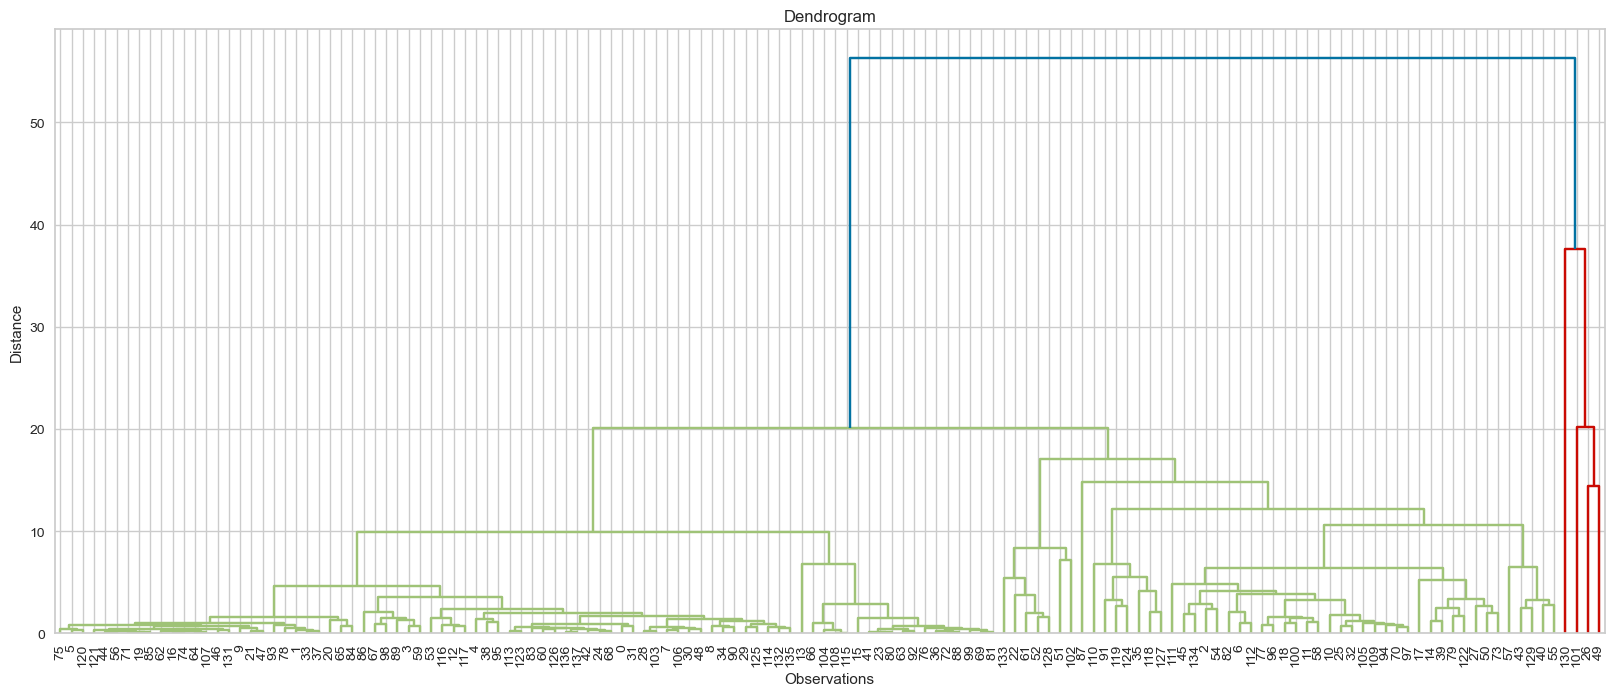

In [151]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

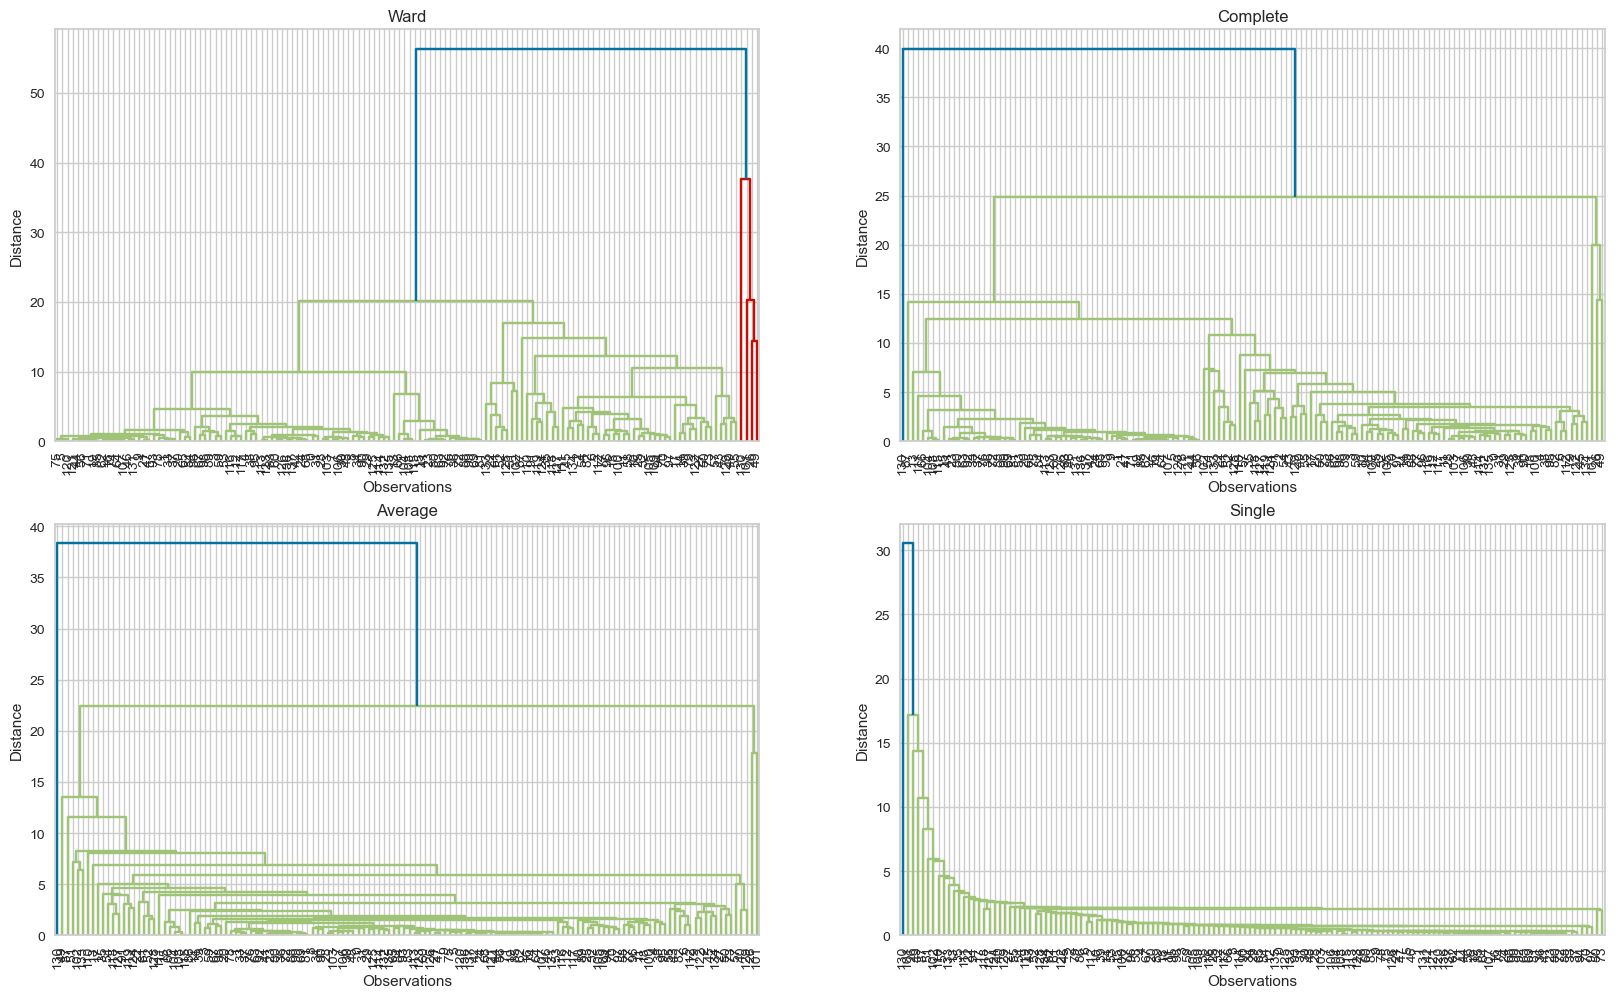

In [152]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

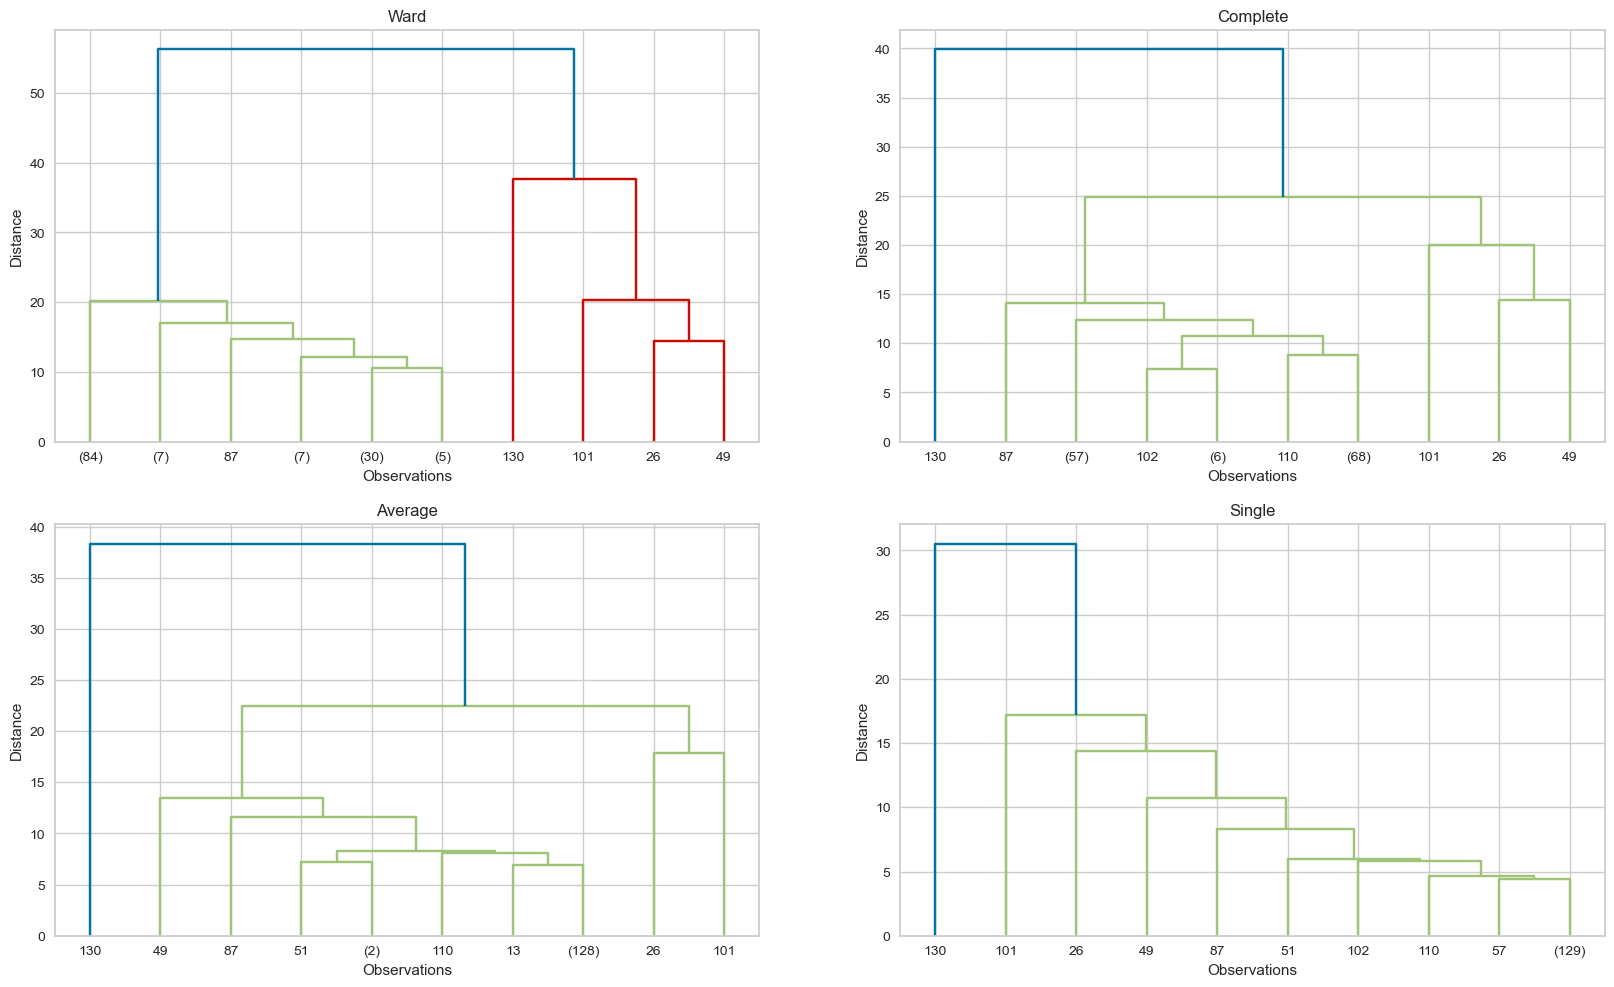

In [154]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [ ]:
# Default değer ward değerlendirildiğinde cluster 2 veya 3 olabilir. 

### Model Building and label visualisation

In [155]:
from sklearn.cluster import AgglomerativeClustering

In [156]:
from sklearn.metrics import silhouette_score

In [157]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_scaled3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled3, model.labels_)}')

Silhouette Score for 2 clusters: 0.8457547050037887
Silhouette Score for 3 clusters: 0.8181360267920251
Silhouette Score for 4 clusters: 0.8068339889216509
Silhouette Score for 5 clusters: 0.3359251448089261
Silhouette Score for 6 clusters: 0.34761828930612254
Silhouette Score for 7 clusters: 0.34595638568058384
Silhouette Score for 8 clusters: 0.34537569439037585
Silhouette Score for 9 clusters: 0.33284336691565697


In [ ]:
# Ward değerlendirmesi ile benzer sonuçlar var. 2 veya 3 cluster oluşturulabilir.

In [158]:
model = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "ward")
model.fit_predict(X_scaled3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [159]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [160]:
clusters_hy = model.labels_

In [176]:
df3["pred_cluster_for2"] = clusters_hy

In [177]:
df3[df3.pred_cluster_for2 == 0][["Countries"]]

Countries
26           China
49           India
101         Russia
130  United States

In [178]:
df3[df3.pred_cluster_for2 == 1][["Countries"]]

Countries
0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                           Argentina
5                             Armenia
6                           Australia
7                             Austria
8                          Azerbaijan
9                             Bahrain
10                         Bangladesh
11                            Belarus
12                            Belgium
13                             Bhutan
14                            Bolivia
15             Bosnia and Herzegovina
16                           Botswana
17                             Brazil
18                           Bulgaria
19                       Burkina Faso
20                           Cambodia
21                           Cameroon
22                             Canada
23           Central African Republic
24                               Chad
25                              Chile
27                           Colombia
28                            Croatia
29                               Cuba
30                            Czechia
31   Democratic Republic of the Congo
32                            Denmark
33                 Dominican Republic
34                            Ecuador
35                              Egypt
36                        El Salvador
37                            Estonia
38                           Ethiopia
39                            Finland
40                             France
41                              Gabon
42                            Georgia
43                            Germany
44                              Ghana
45                             Greece
46                          Guatemala
47                           Honduras
48                            Hungary
50                          Indonesia
51                               Iran
52                               Iraq
53                            Ireland
54                             Israel
55                              Italy
56                        Ivory Coast
57                              Japan
58                             Jordan
59                         Kazakhstan
60                              Kenya
61                             Kuwait
62                         Kyrgyzstan
63                               Laos
64                             Latvia
65                            Lebanon
66                            Liberia
67                              Libya
68                          Lithuania
69                         Madagascar
70                           Malaysia
71                               Mali
72                         Mauritania
73                             Mexico
74                            Moldova
75                           Mongolia
76                         Montenegro
77                            Morocco
78                         Mozambique
79                            Myanmar
80                            Namibia
81                              Nepal
82                        Netherlands
83                        New Zealand
84                          Nicaragua
85                              Niger
86                            Nigeria
87                        North Korea
88                    North Macedonia
89                             Norway
90                               Oman
91                           Pakistan
92                             Panama
93                           Paraguay
94                               Peru
95                        Philippines
96                             Poland
97                           Portugal
98                              Qatar
99              Republic of the Congo
100                           Romania
102                      Saudi Arabia
103                            Serbia
104                      Sierra Leone
105                         Singapore
106                          Slovakia
107                          Slovenia


In [164]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X_scaled3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [165]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [168]:
clusters_hy3 = model1.labels_

In [170]:
df3["pred_cluster_for_3"] = clusters_hy3

In [171]:
df3[df3.pred_cluster_for_3 == 0][["Countries"]]

Countries
26      China
49      India
101    Russia

In [174]:
df3[df3.pred_cluster_for_3 == 2][["Countries"]]

Countries
130  United States

In [175]:
df3[df3.pred_cluster_for_3 == 1][["Countries"]]

Countries
0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                           Argentina
5                             Armenia
6                           Australia
7                             Austria
8                          Azerbaijan
9                             Bahrain
10                         Bangladesh
11                            Belarus
12                            Belgium
13                             Bhutan
14                            Bolivia
15             Bosnia and Herzegovina
16                           Botswana
17                             Brazil
18                           Bulgaria
19                       Burkina Faso
20                           Cambodia
21                           Cameroon
22                             Canada
23           Central African Republic
24                               Chad
25                              Chile
27                           Colombia
28                            Croatia
29                               Cuba
30                            Czechia
31   Democratic Republic of the Congo
32                            Denmark
33                 Dominican Republic
34                            Ecuador
35                              Egypt
36                        El Salvador
37                            Estonia
38                           Ethiopia
39                            Finland
40                             France
41                              Gabon
42                            Georgia
43                            Germany
44                              Ghana
45                             Greece
46                          Guatemala
47                           Honduras
48                            Hungary
50                          Indonesia
51                               Iran
52                               Iraq
53                            Ireland
54                             Israel
55                              Italy
56                        Ivory Coast
57                              Japan
58                             Jordan
59                         Kazakhstan
60                              Kenya
61                             Kuwait
62                         Kyrgyzstan
63                               Laos
64                             Latvia
65                            Lebanon
66                            Liberia
67                              Libya
68                          Lithuania
69                         Madagascar
70                           Malaysia
71                               Mali
72                         Mauritania
73                             Mexico
74                            Moldova
75                           Mongolia
76                         Montenegro
77                            Morocco
78                         Mozambique
79                            Myanmar
80                            Namibia
81                              Nepal
82                        Netherlands
83                        New Zealand
84                          Nicaragua
85                              Niger
86                            Nigeria
87                        North Korea
88                    North Macedonia
89                             Norway
90                               Oman
91                           Pakistan
92                             Panama
93                           Paraguay
94                               Peru
95                        Philippines
96                             Poland
97                           Portugal
98                              Qatar
99              Republic of the Congo
100                           Romania
102                      Saudi Arabia
103                            Serbia
104                      Sierra Leone
105                         Singapore
106                          Slovakia
107                          Slovenia


### Evaluate 

In [ ]:
# K-Means ile benzer sonuçlar alındı. 